# ENCUESTA DE CURSADA
## Segundo Cuatrimestre 2016
### Departamento de Computación FIUBA

In [1]:
import numpy as np 
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
comp = pd.read_csv('encuesta.csv')
comp.sample(1)

Timestamp                 Curso  \
187  2016/12/16 11:04:35 PM GMT-3  Computación-Strobino   

    Opinión General Sobre el Curso ¿Aprobó la Cursada?  \
187                          Bueno                  Sí   

    ¿Cómo te Resultaron los Temas de la Materia?  \
187                                 Interesantes   

    ¿Los Temas de la Materia Están Actualizados?  \
187                                           No   

    Nivel de las Clases Teóricas del Curso  \
187                                 Buenas   

    Nivel de las Clases Prácticas del Curso Dificultad del Curso  \
187                 No Hay Clases Prácticas                Facil   

    Dificultad del TP Comentarios Sobre el Curso  
187           Dificil                        NaN

#### Total de Encuestas Procesadas

In [3]:
len(comp)

458

In [4]:
# This not used :)
filter = (comp["Comentarios Sobre el Curso"].notnull())
opinions = comp.loc[filter,['Curso','Comentarios Sobre el Curso']].sort_values('Curso')

In [5]:
map_sino = {'Sí':5,'No':1}
map_opinion = {'Excelente':5,'Muy Bueno':4, 'Bueno':3,'Regular':2,'Malo':1}
map_temas = {'Interesantes':4,'Muy Interesantes':5, 'Poco Interesantes':2,'Nada Interesantes':1}
map_clases_teoricas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No hay clases teóricas':np.NaN}
map_dificultad_tp = {'Muy dificil':5,'Dificil':4,'Normal':3,'Fácil':2,'Muy Fácil':1, 'No hay TP': np.NaN}
map_dificultad = {'Muy Dificil':5,'Dificil':4,'Normal':3,'Facil':2,'Muy Facil':1, 'No hay TP': np.NaN}
map_clases_practicas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No Hay Clases Prácticas':np.NaN}
comp.replace({"¿Aprobó la Cursada?": map_sino},inplace=True)
comp.replace({"¿Los Temas de la Materia Están Actualizados?": map_sino},inplace=True)
comp.replace({"Opinión General Sobre el Curso": map_opinion},inplace=True)
comp.replace({"Nivel de las Clases Teóricas del Curso": map_clases_teoricas},inplace=True)
comp.replace({"Nivel de las Clases Prácticas del Curso": map_clases_practicas},inplace=True)
comp.replace({"Dificultad del Curso": map_dificultad},inplace=True)
comp.replace({"Dificultad del TP": map_dificultad_tp},inplace=True)
comp.replace({"¿Cómo te Resultaron los Temas de la Materia?": map_temas},inplace=True)

## Histograma de calificaciones para la opinión general sobre el curso


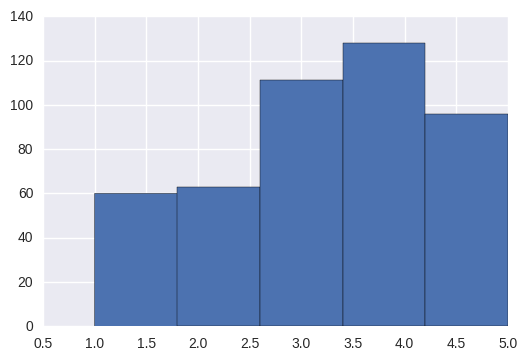

In [6]:
comp['Opinión General Sobre el Curso'].hist(bins=5);

In [7]:
grouped = comp.groupby('Curso')
num_votes = grouped.agg('size')
g_mean = grouped.mean()
g_mean['votes']=num_votes

## Varianza de la Opinión por Curso
Este gráfico muestra la variabilidad de la pregunta "Opinión General Sobre el Curso", a menor valor mas consistentes los resultados de la encuesta. Los valores mayores muestran disparidad de resultados en cuanto a la opinión general sobre el curso.

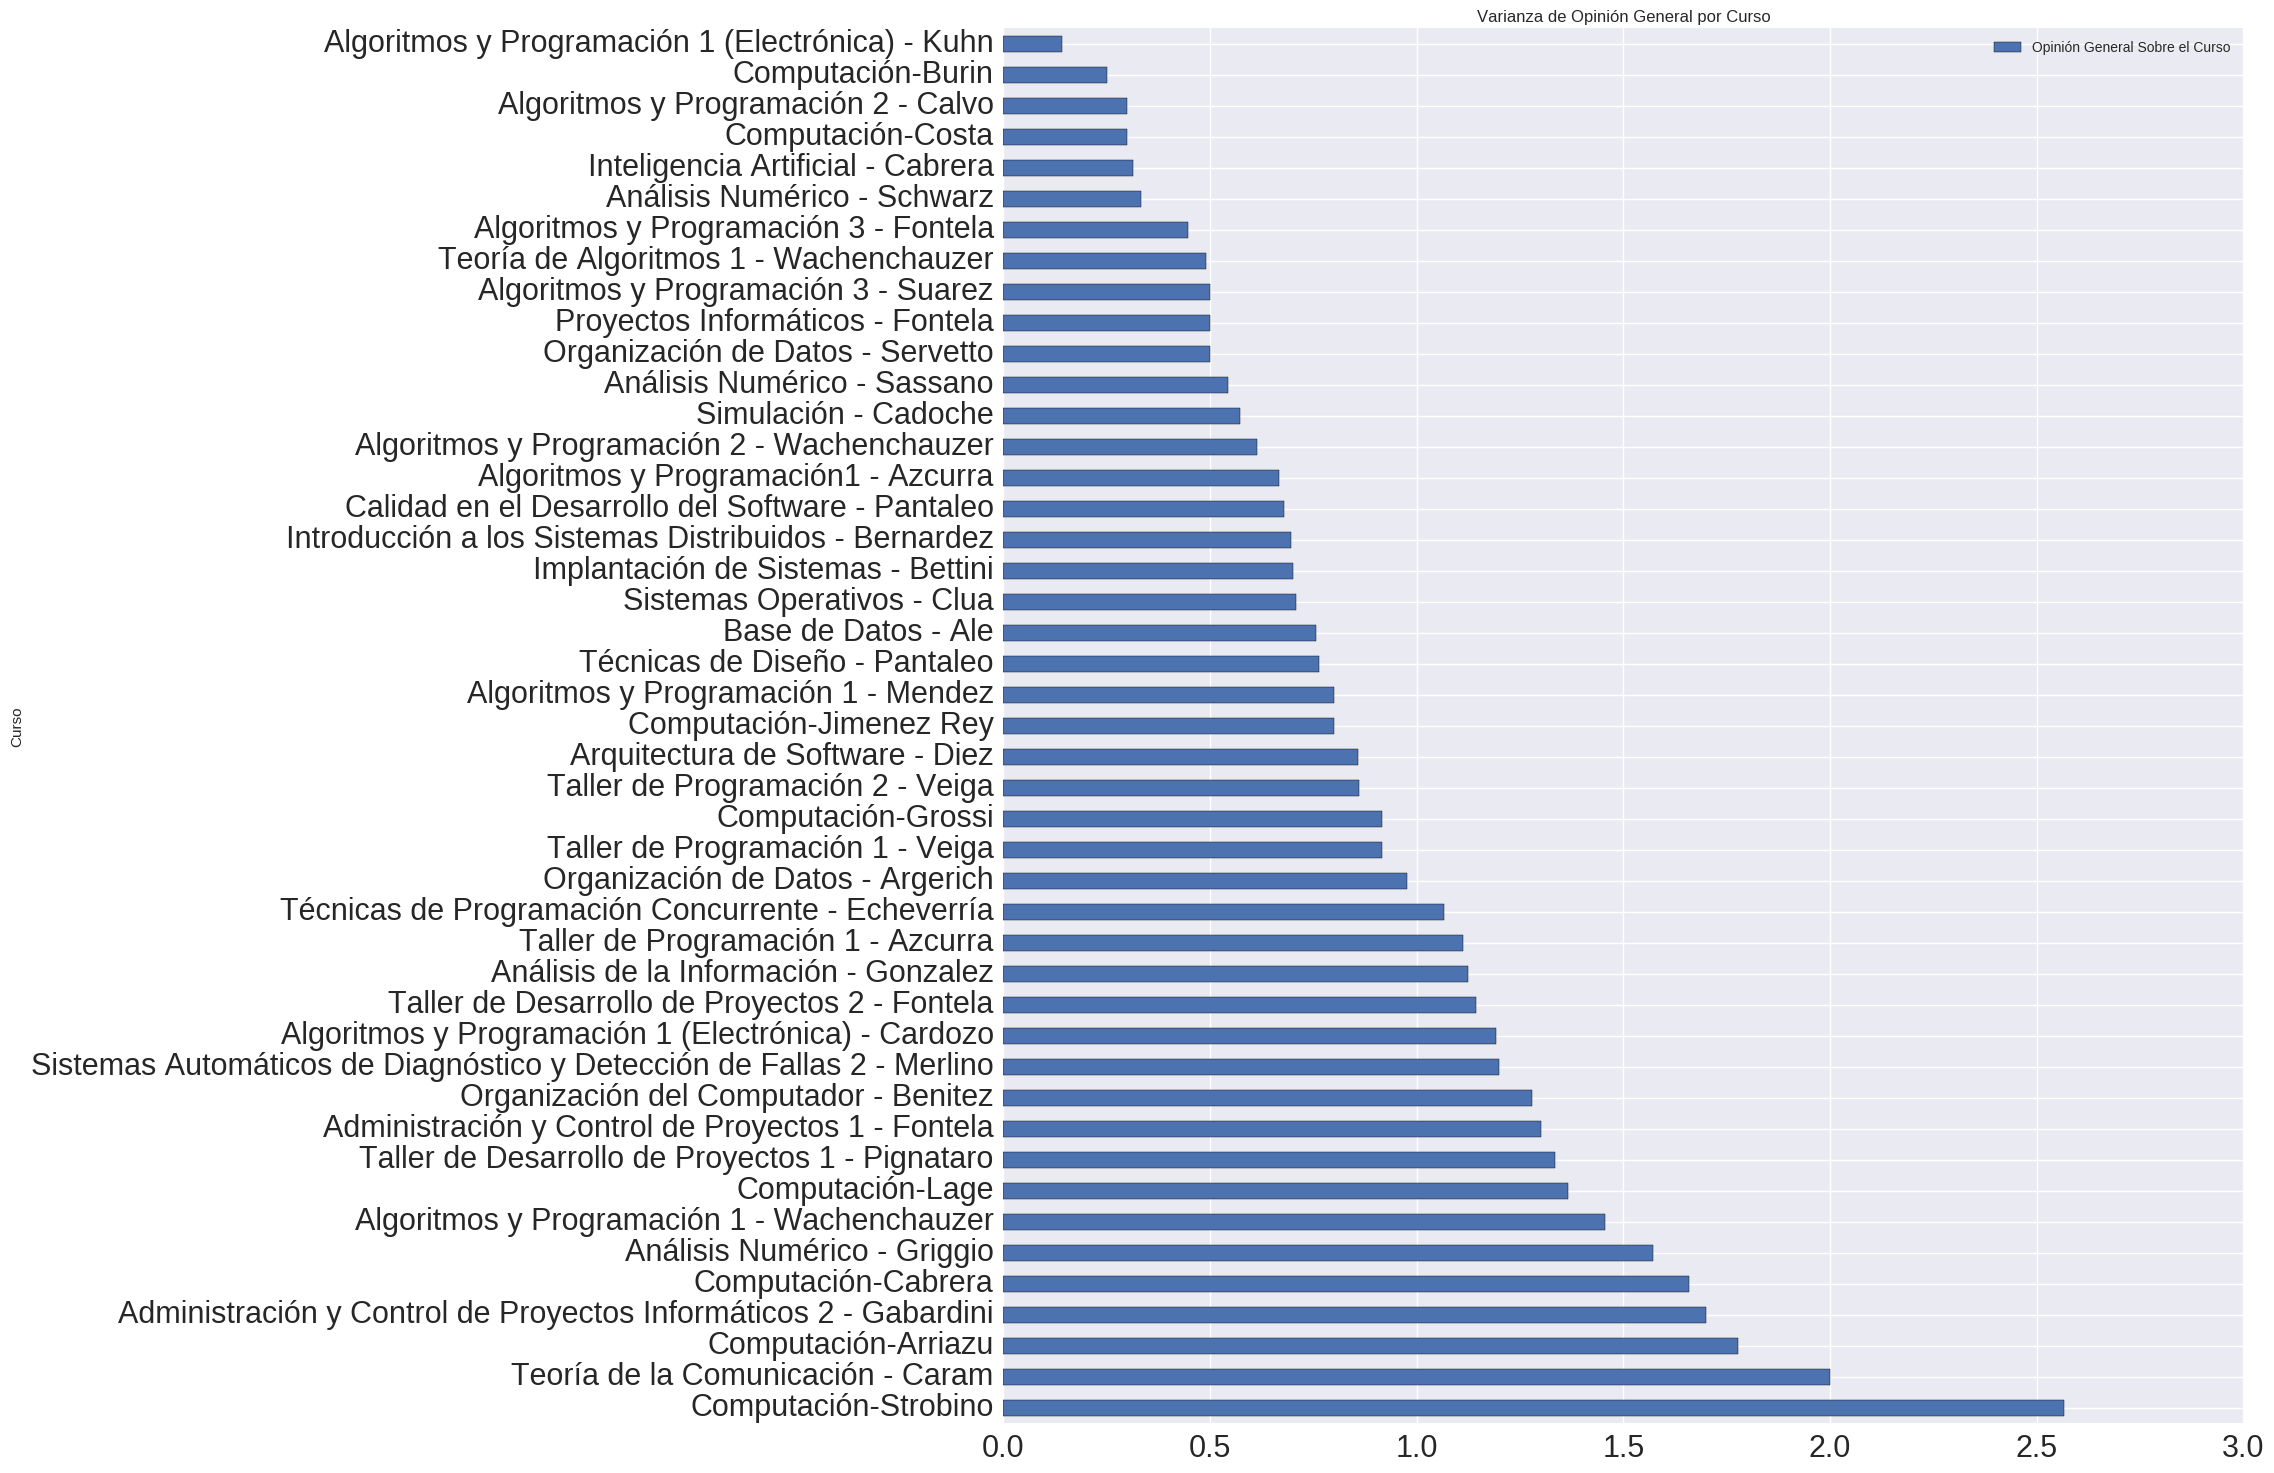

In [8]:
g_var = grouped.var()
gop = g_var.loc[g_var['Opinión General Sobre el Curso']>0,['Opinión General Sobre el Curso']].\
    sort_values(by='Opinión General Sobre el Curso',ascending=False).\
    plot(kind='barh',figsize=(16,18),title='Varianza de Opinión General por Curso',fontsize=22);

## Cantidad de Encuestados por Curso
Cantidad de encuestas completadas por cada Curso.

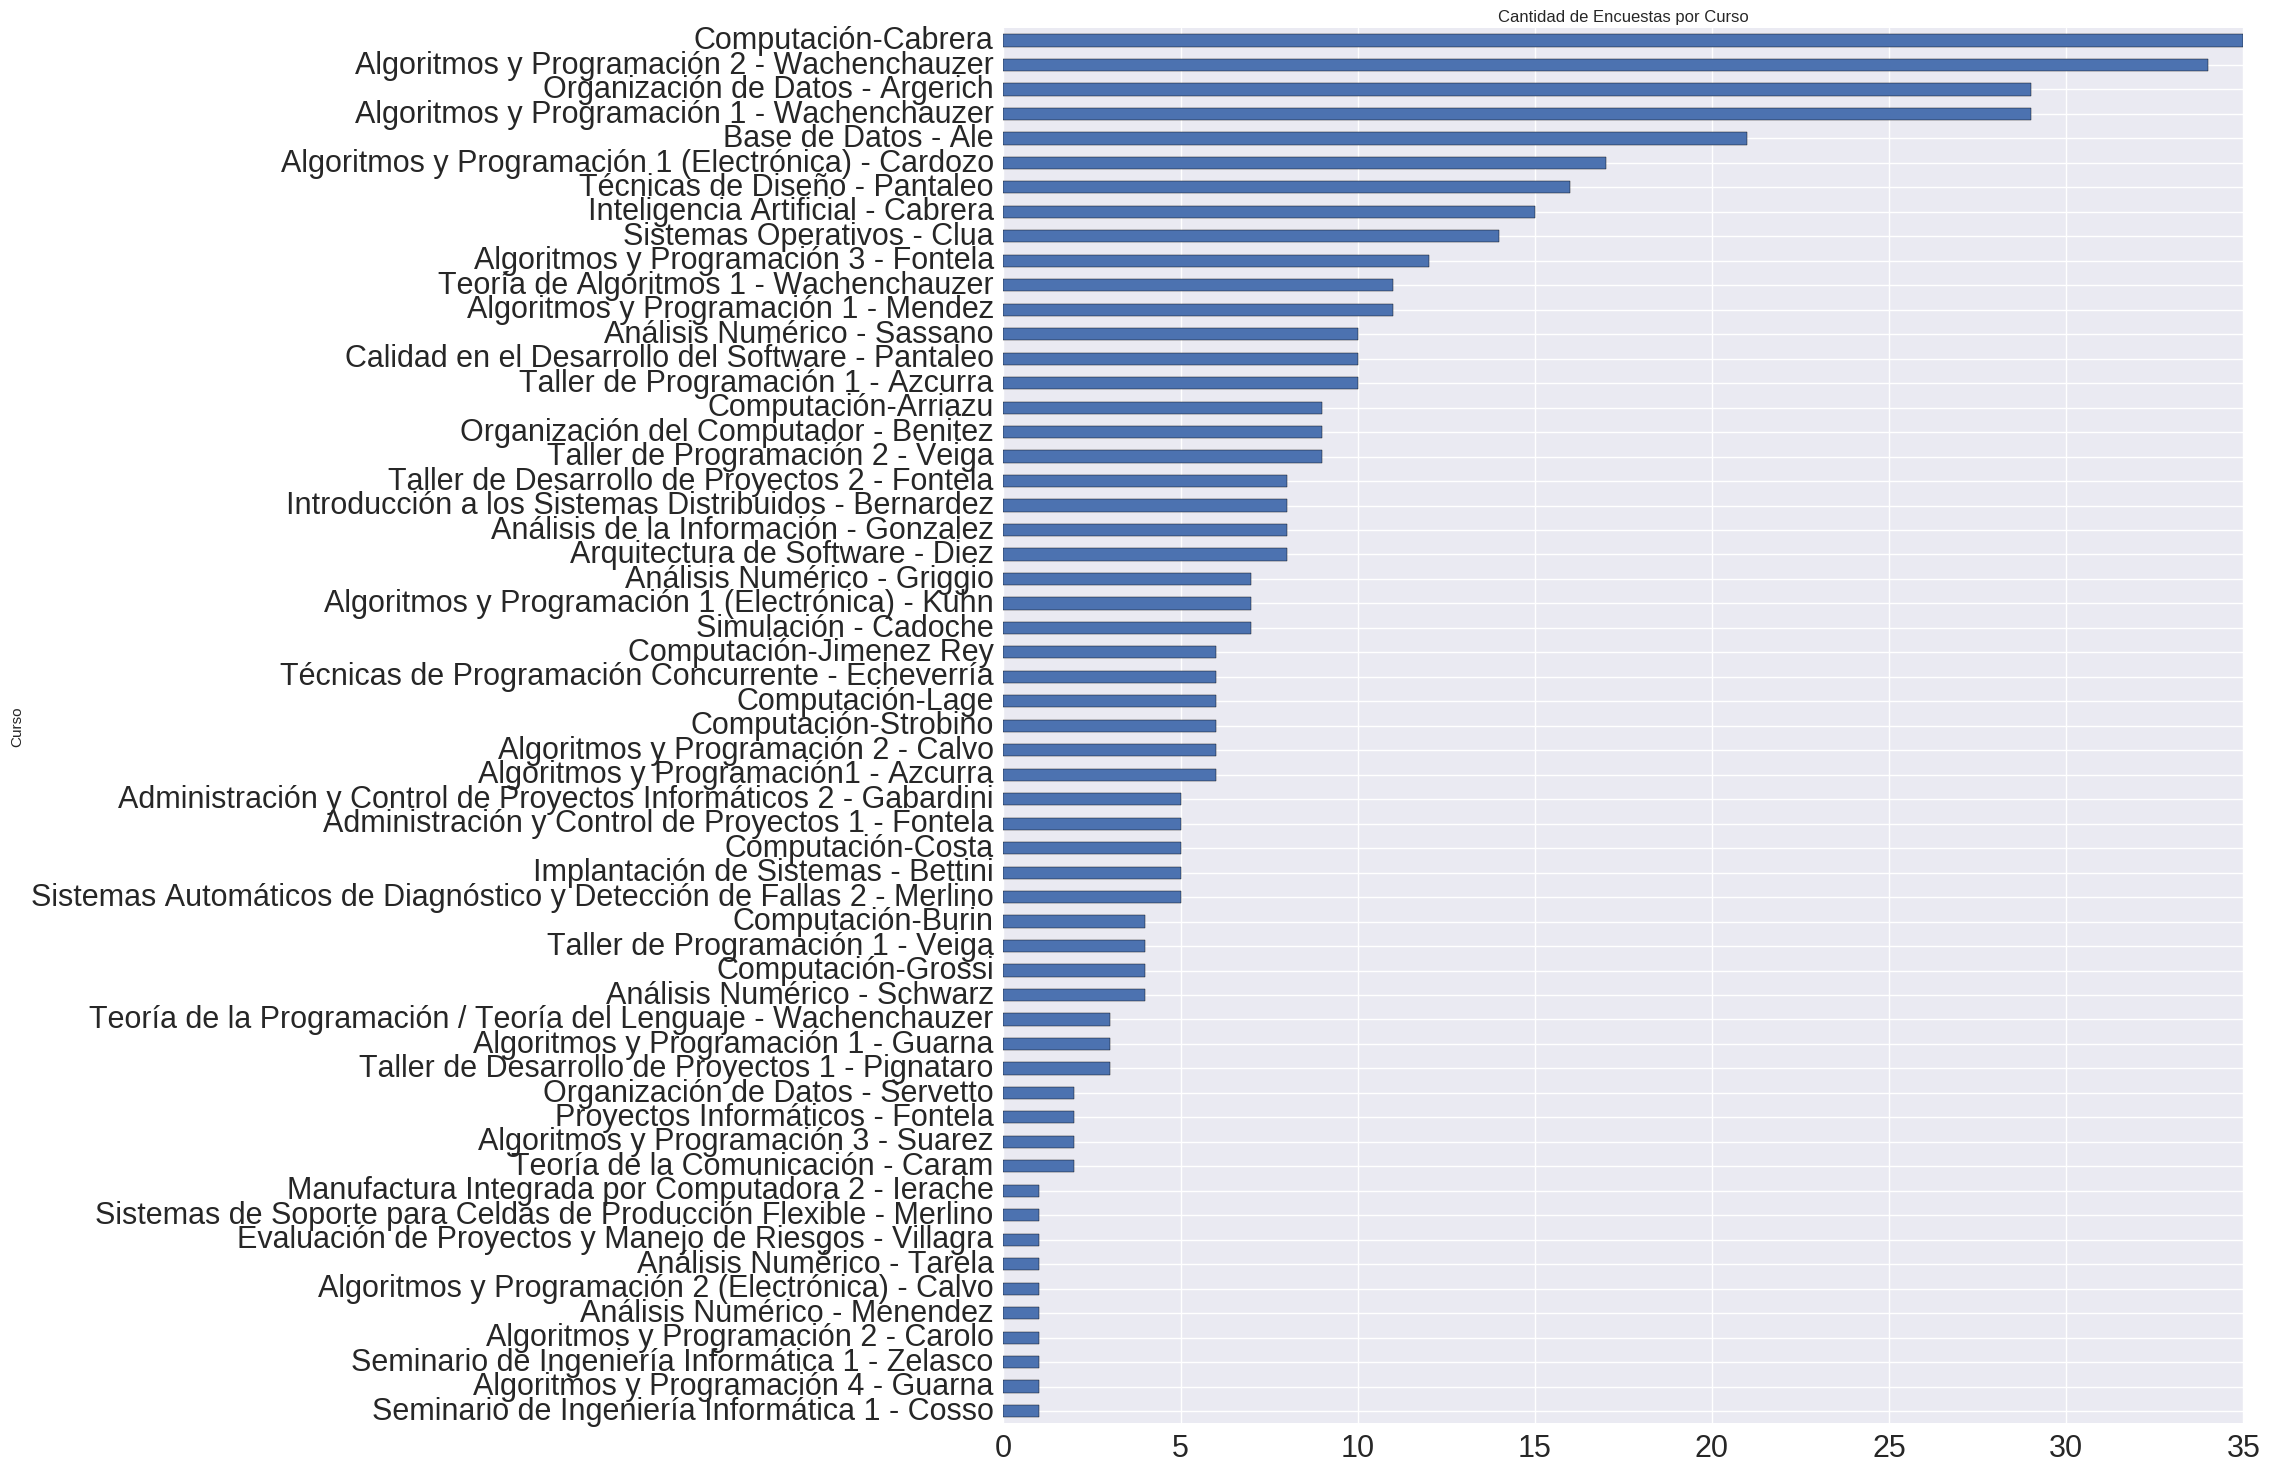

In [9]:
g_mean['votes'].sort_values(ascending=True).plot(kind='barh',figsize=(16,18),title='Cantidad de Encuestas por Curso',fontsize=22);

In [10]:
# Quedarnos unicamente con los cursos que tienen 4 o mas encuestas
g_mean = g_mean.loc[g_mean['votes']>4,:]
lista_cursos = g_mean.index.tolist()

## Heatmap de Evaluación de Cursos (5 o mas respuestas)
Esta matriz muestra el promedio de calificaciones para cada pregunta de la encuesta para los cursos que tienen 5 o mas encuestas. Orden alfabético por curso.

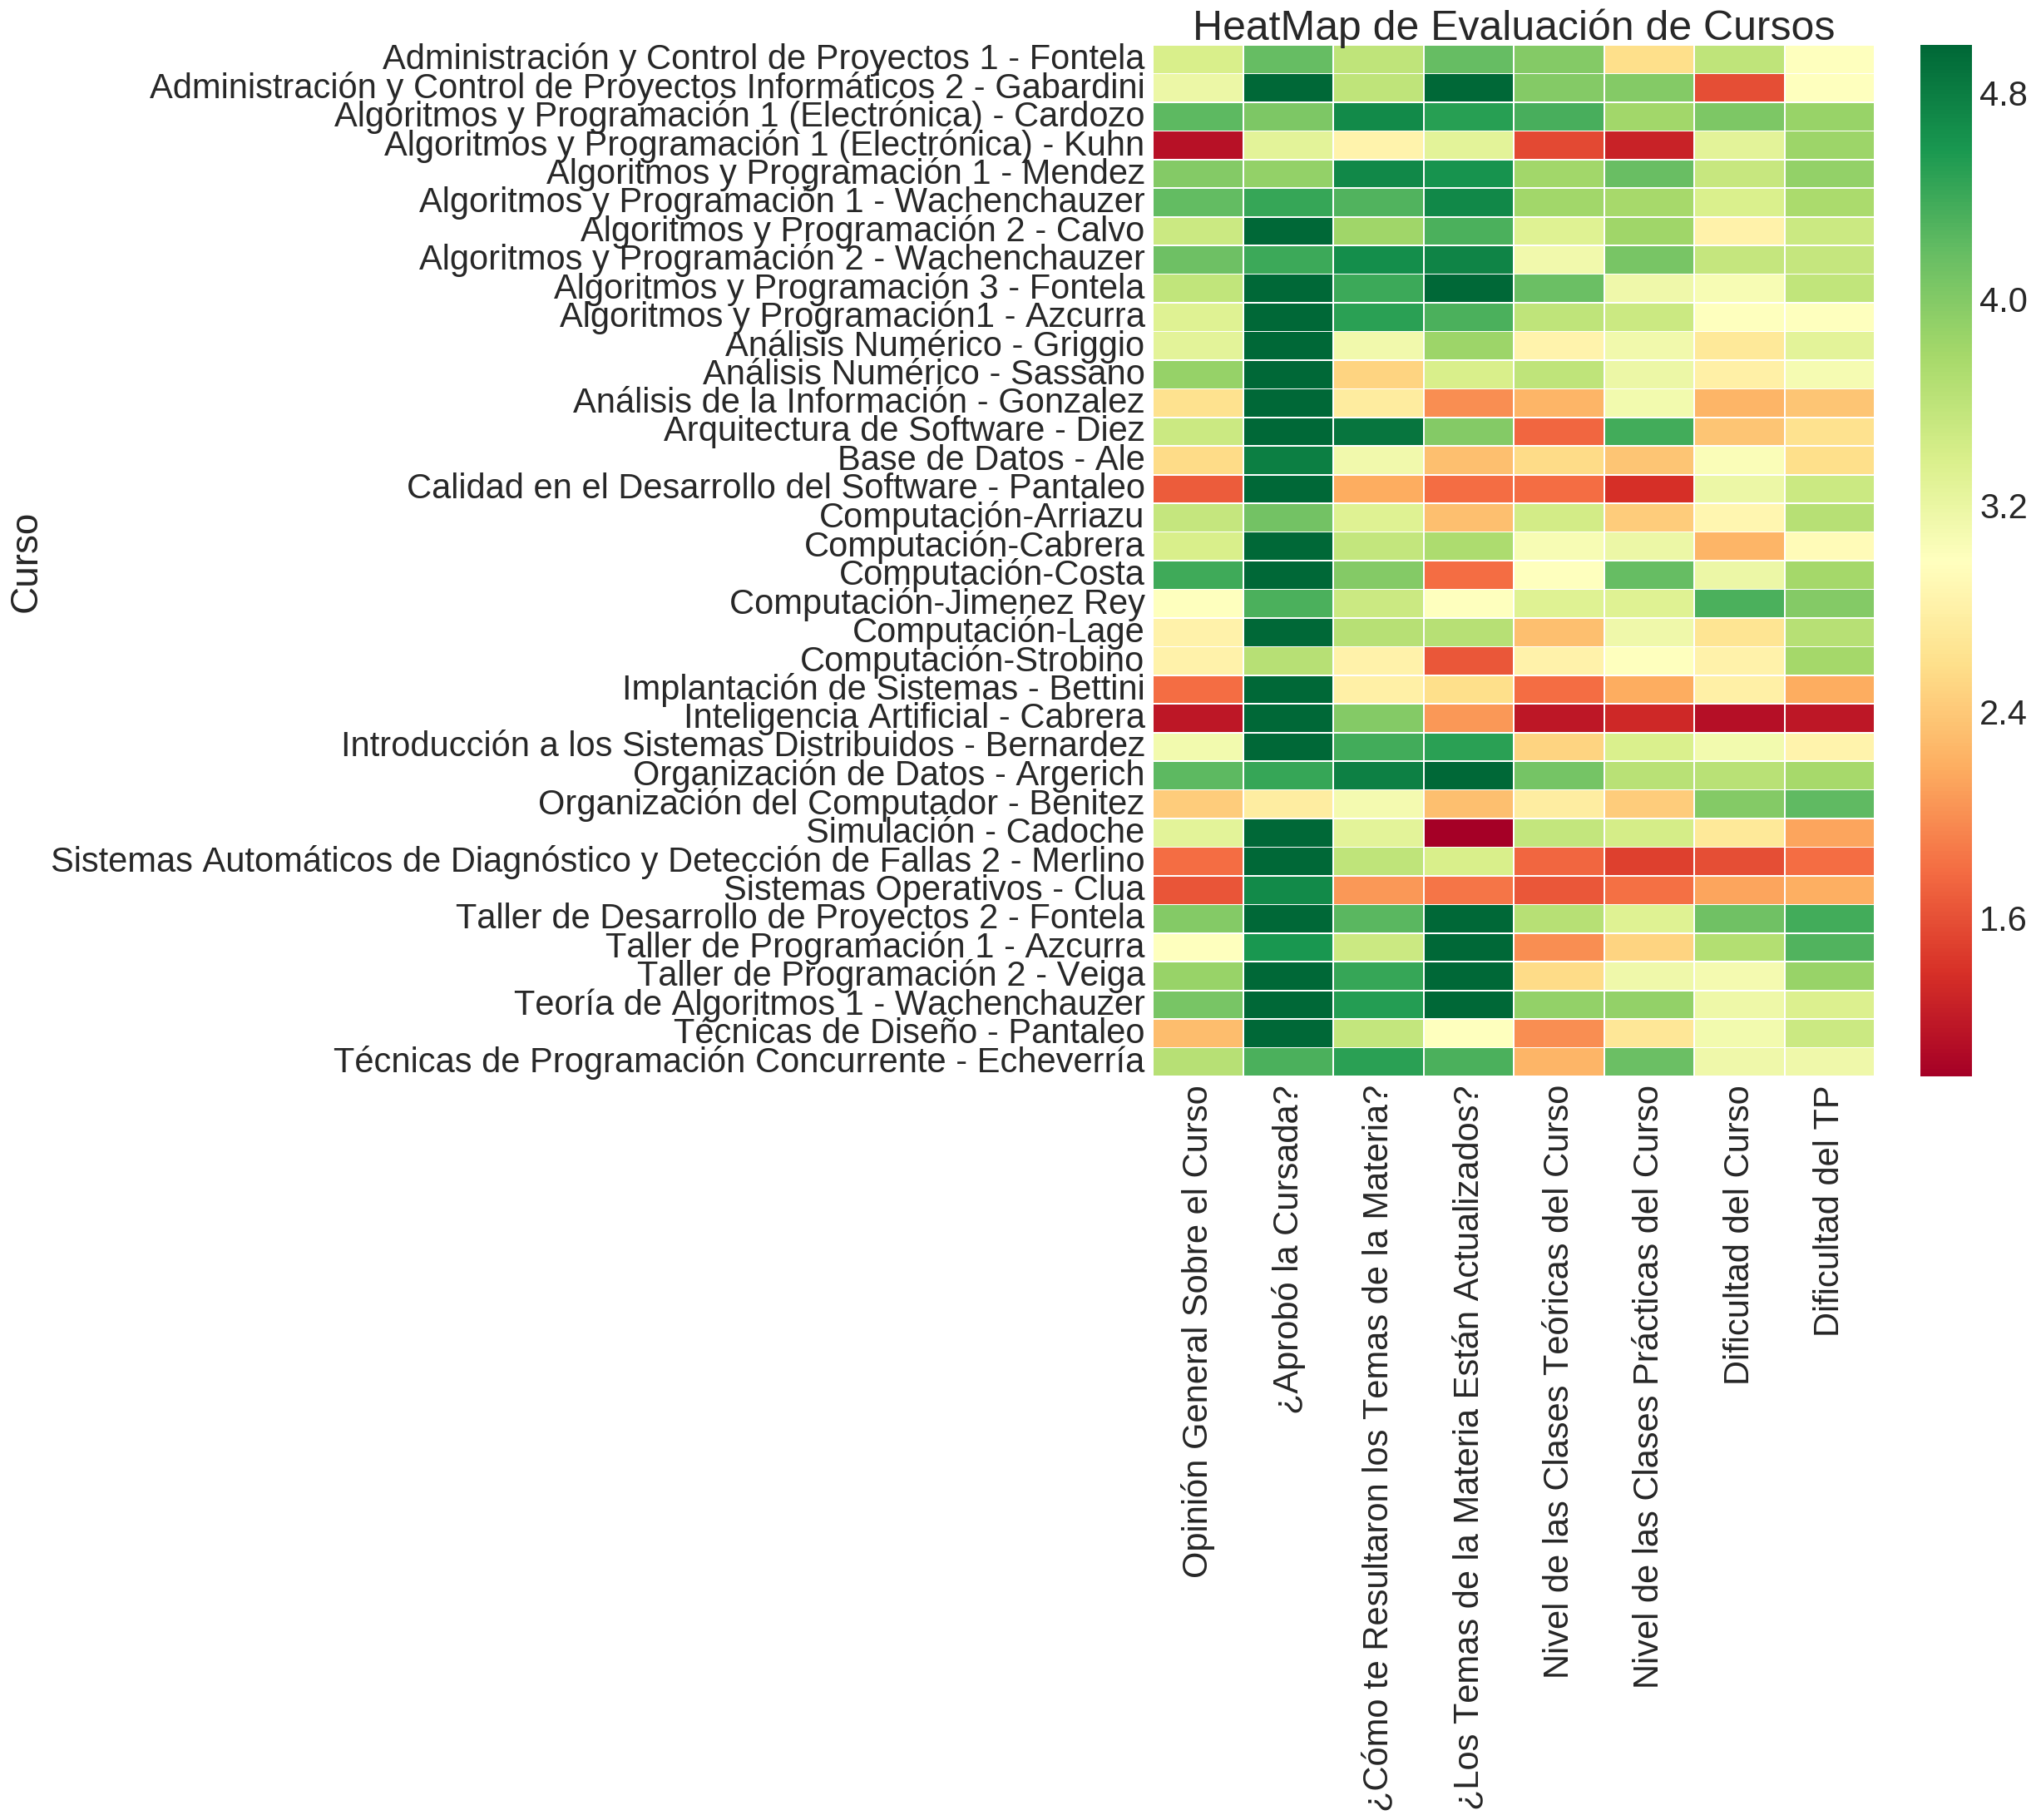

In [13]:
g_mean2 = g_mean.drop('votes',1)
fig, ax = plt.subplots(figsize=(14,16))        
sns.set(font_scale=3.0)
sns.heatmap(g_mean2, annot=False, linewidths=.5,cmap='RdYlGn',  ax=ax);
plt.title('HeatMap de Evaluación de Cursos');

## Histograma del Promedio de Opiniones de los Cursos (un promedio x curso)
Por cada curso se calcula el promedio de la pregunta "Opinión general sobre el curso" y luego se hace un histograma de los resultados. El gráfico solo incluye aquellos cursos con 5 o mas encuestas.

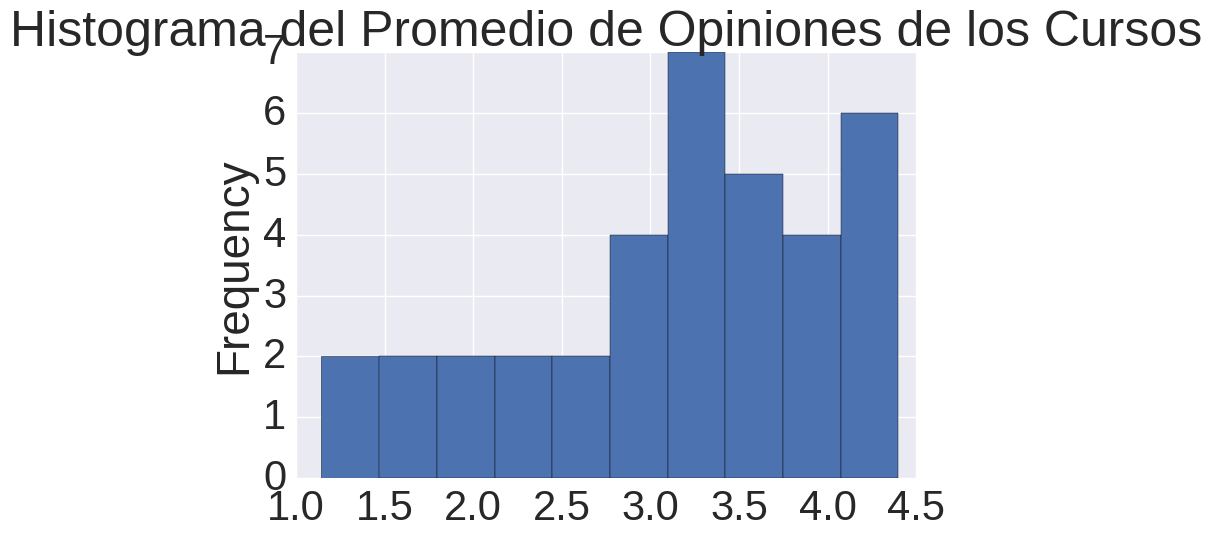

In [14]:
g_mean['Opinión General Sobre el Curso'].plot(kind='hist',bins=10,title='Histograma del Promedio de Opiniones de los Cursos');

## Opinion General Sobre el Curso

In [15]:
CUTLIST = [0,2,3,3.5,4.5,5]
LABELSLIST = ['r','orange','y','g', 'b']

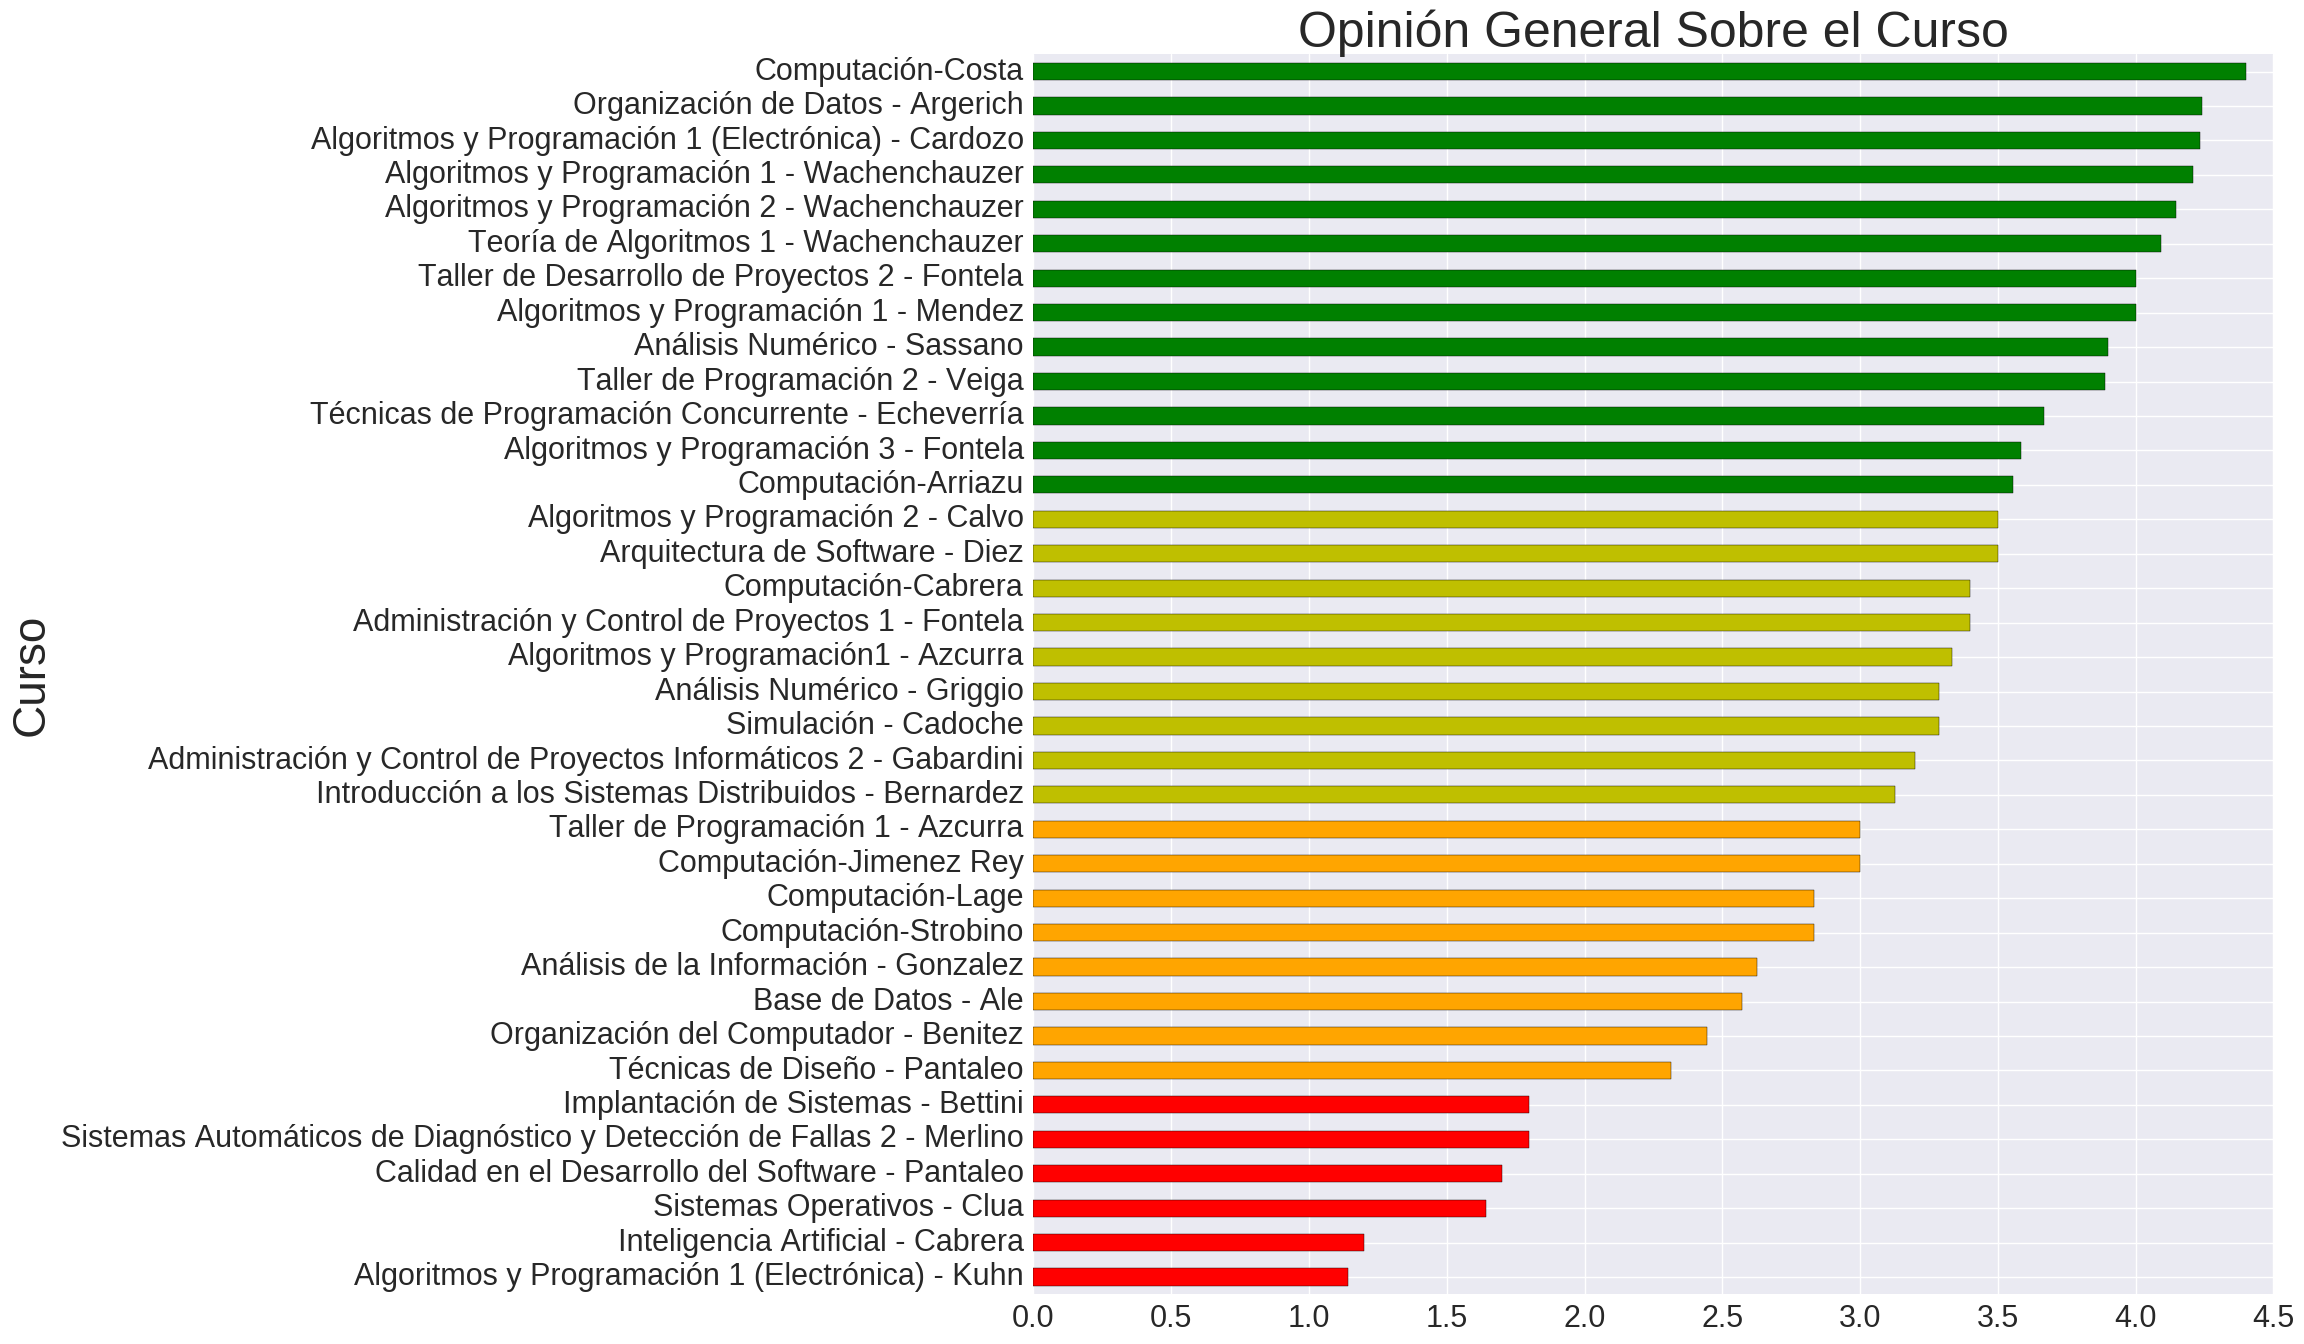

In [16]:
VARIABLE = 'Opinión General Sobre el Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title=VARIABLE);

## ¿Los Temas de la Materia son Interesantes?

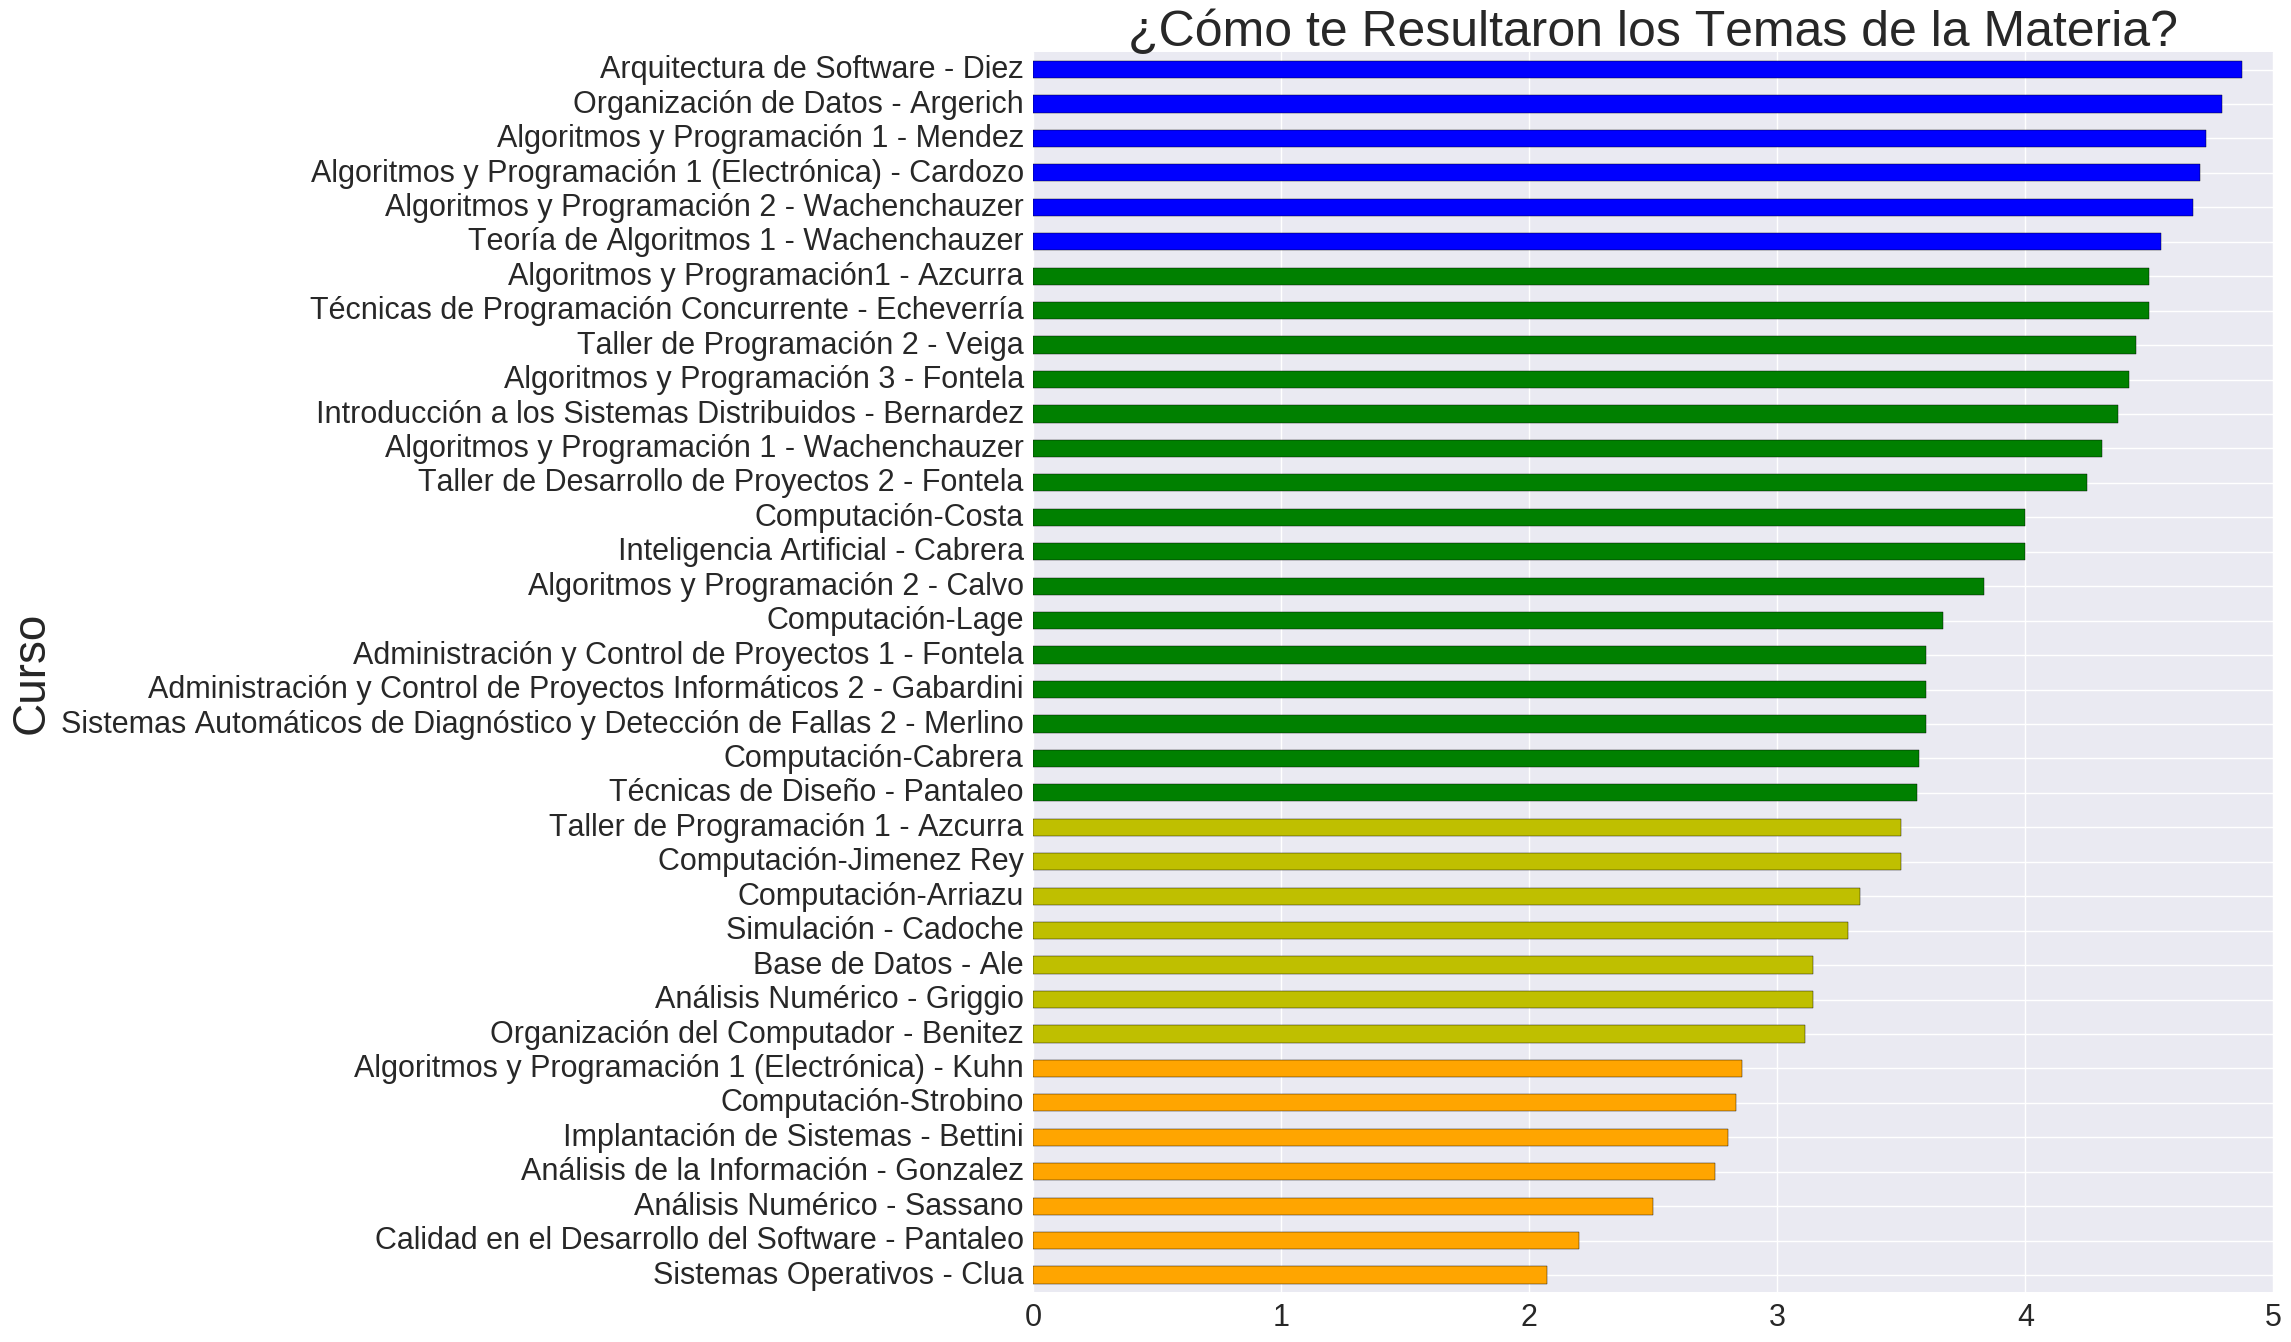

In [17]:
VARIABLE = '¿Cómo te Resultaron los Temas de la Materia?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors= pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title=VARIABLE);

## ¿Los Temas Están Actualizados?

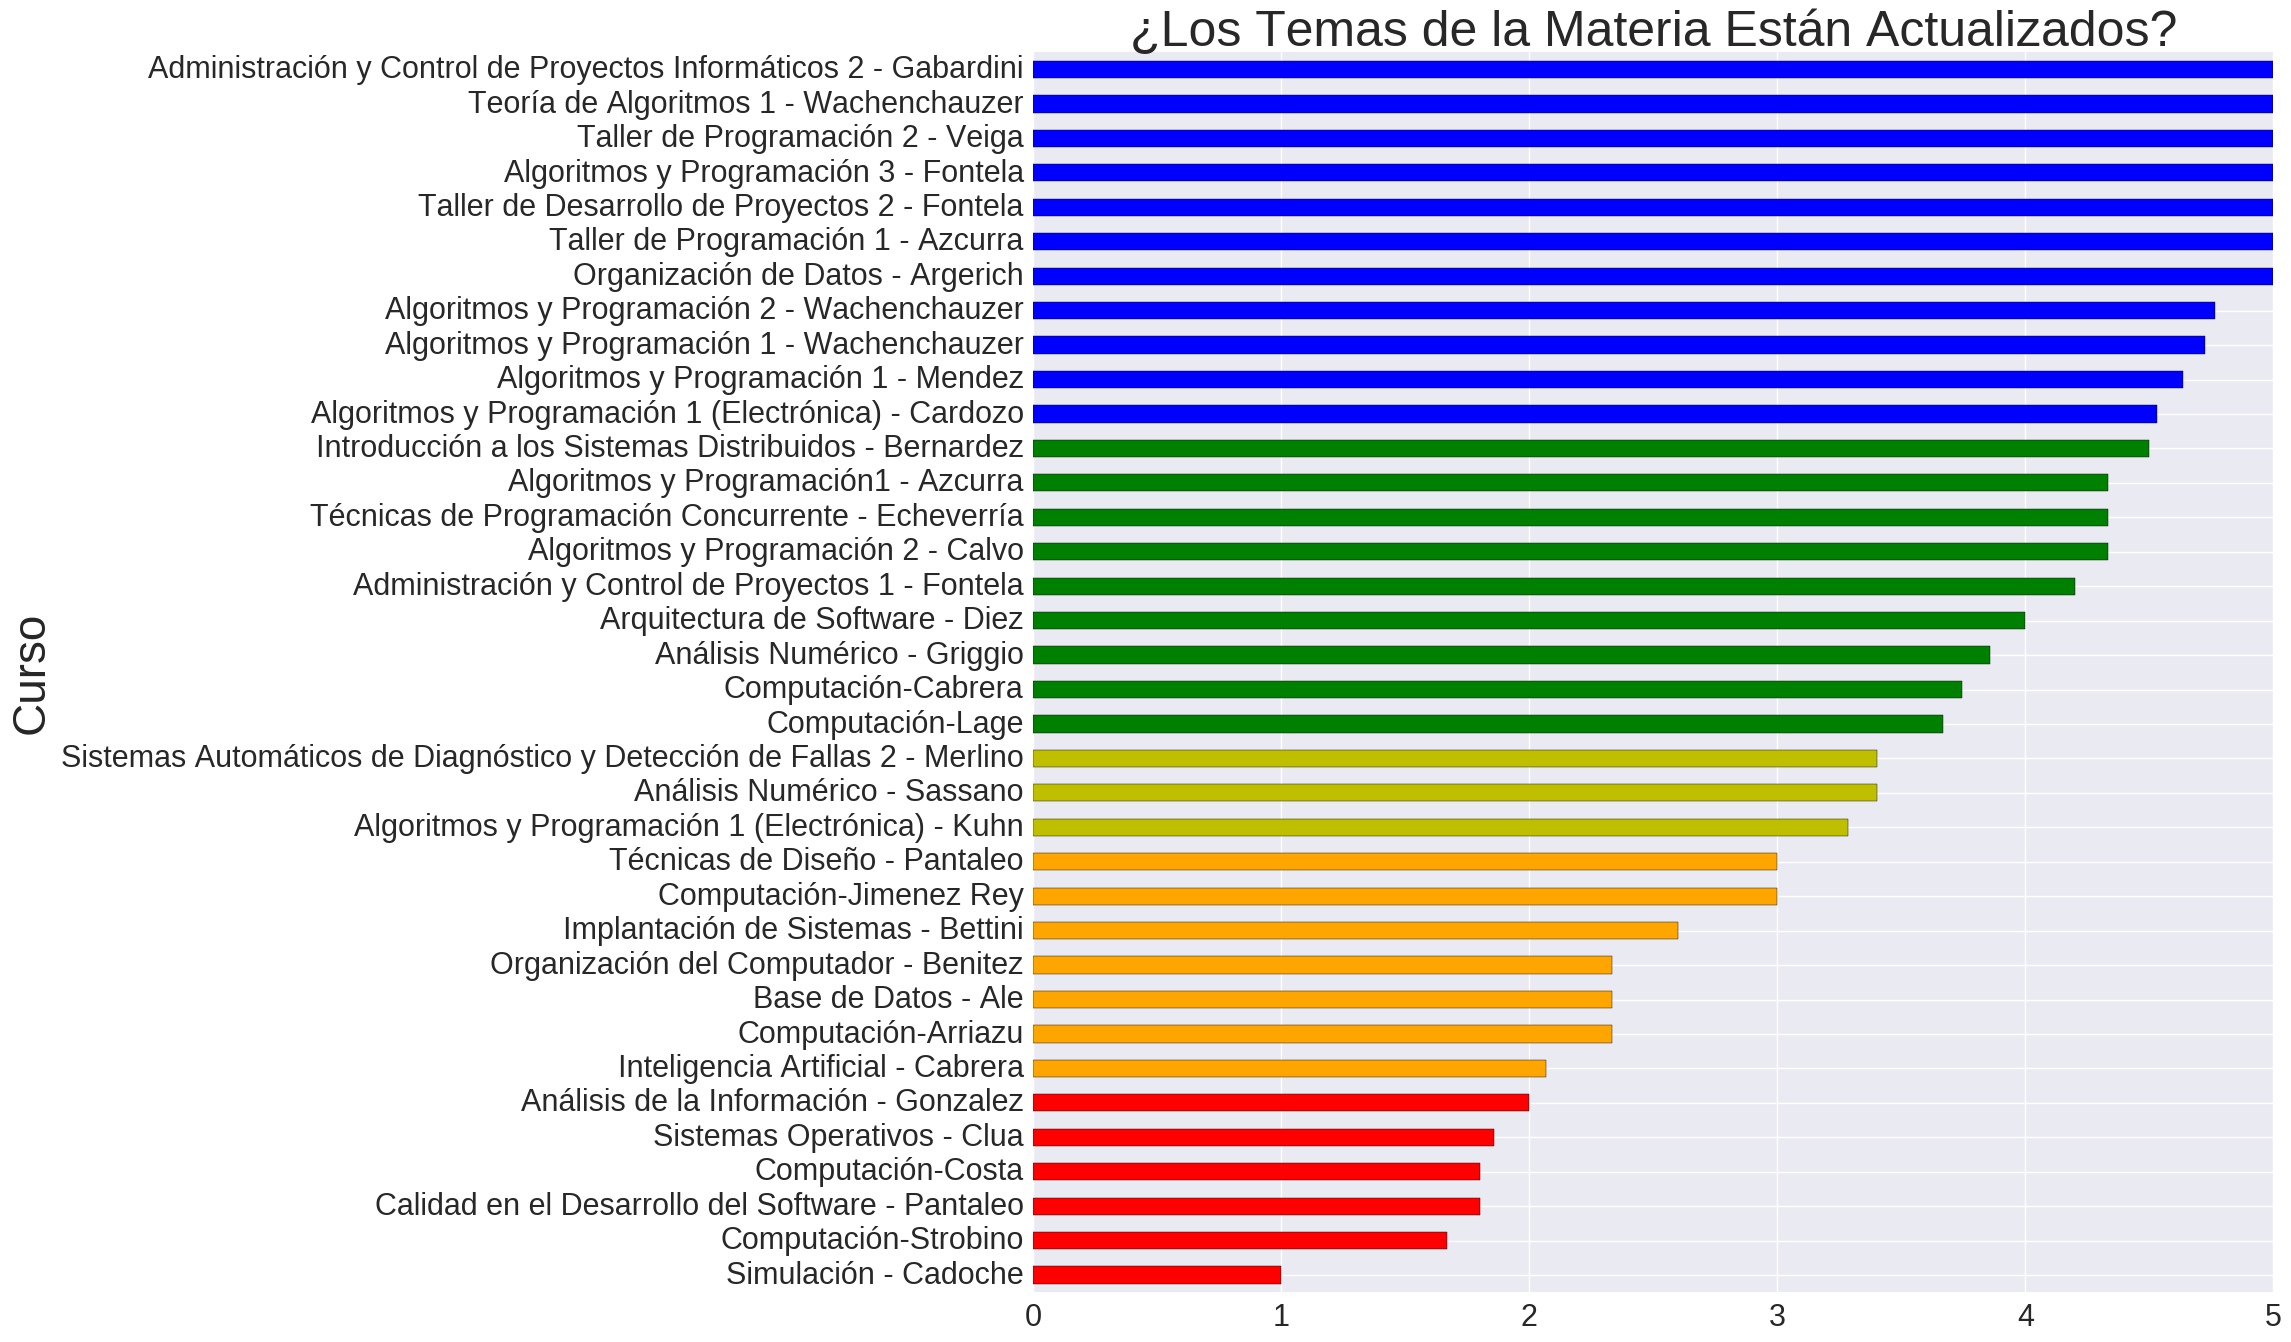

In [18]:
VARIABLE = '¿Los Temas de la Materia Están Actualizados?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title=VARIABLE);

## Nivel de las Clases Teóricas

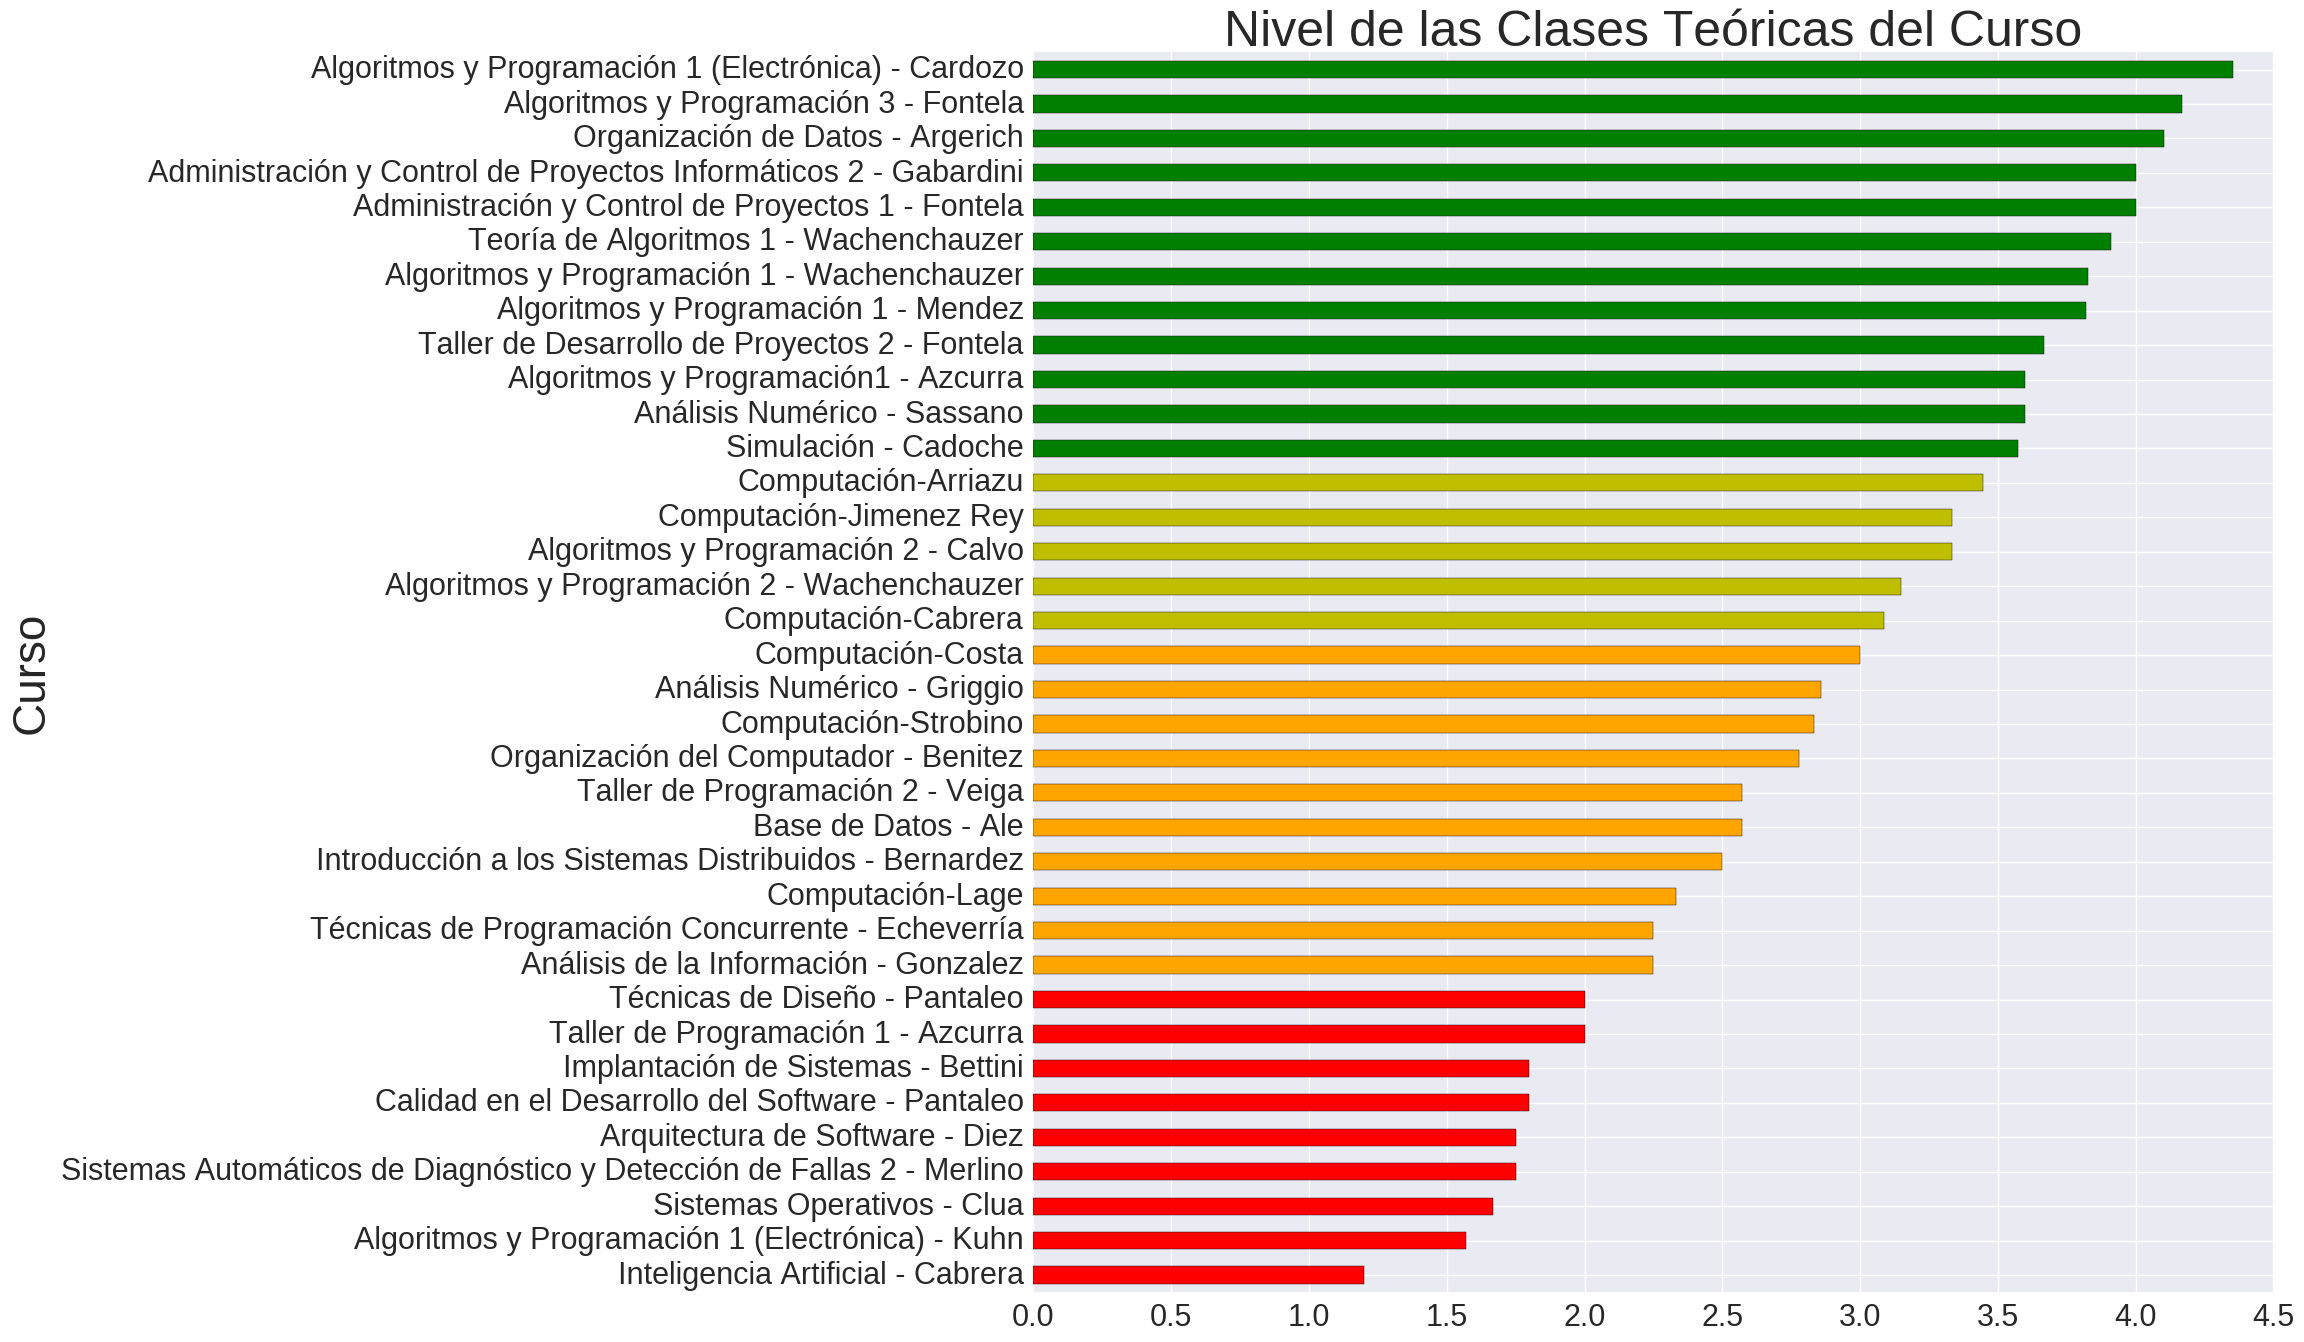

In [19]:
VARIABLE = 'Nivel de las Clases Teóricas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title=VARIABLE);

## Nivel de las Clases Prácticas del Curso

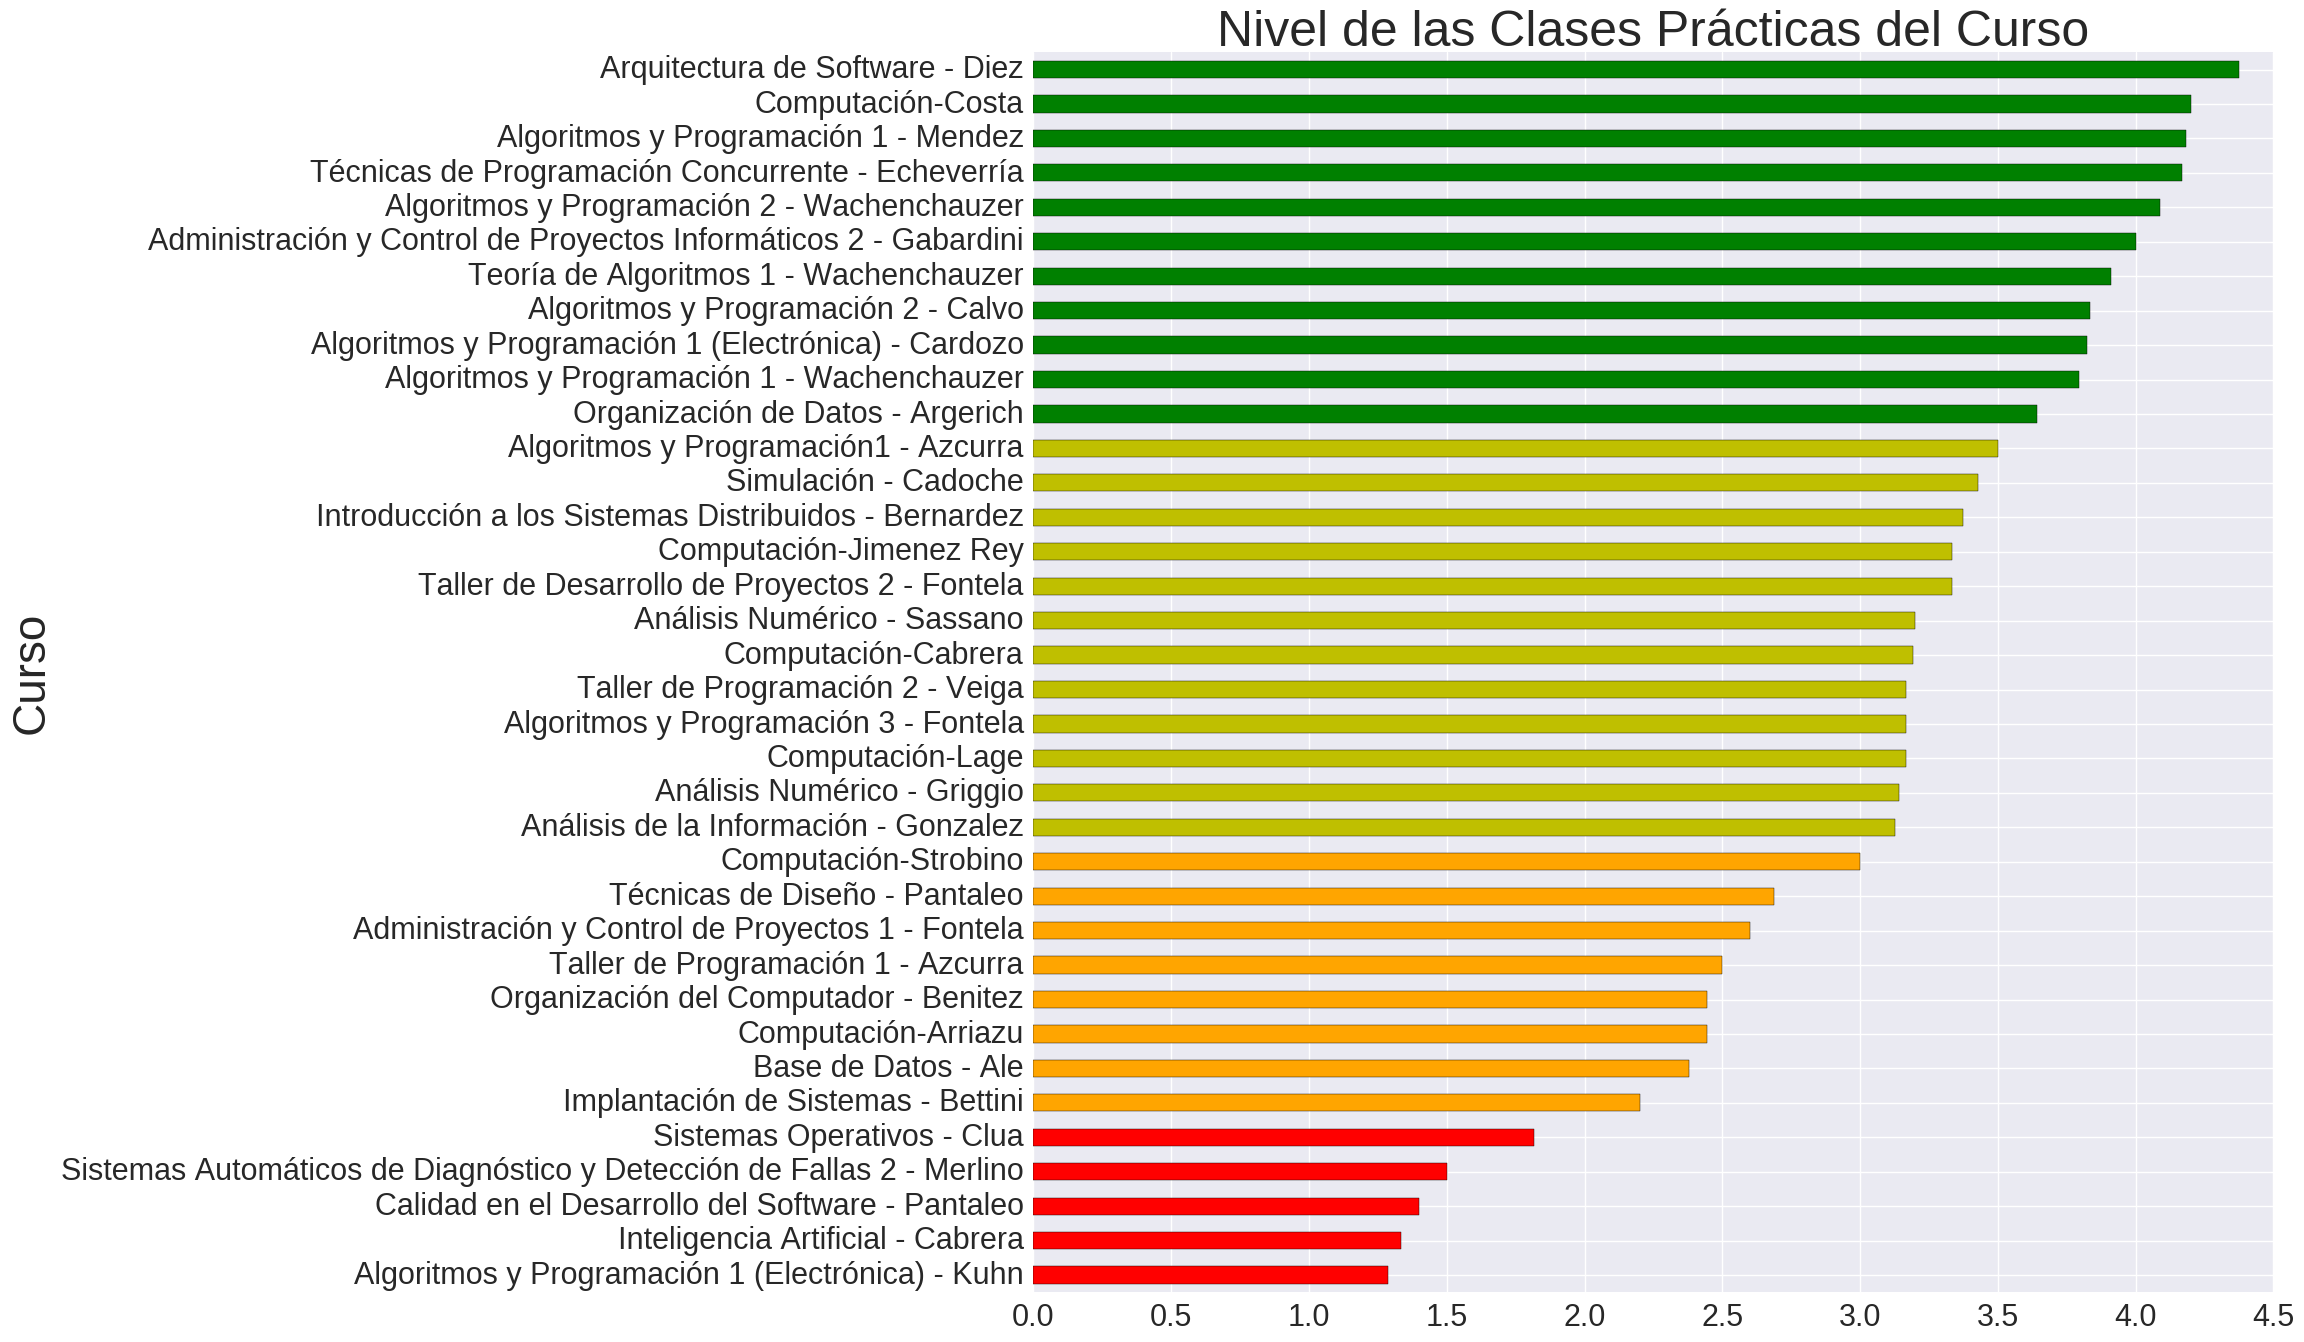

In [20]:
VARIABLE = 'Nivel de las Clases Prácticas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title=VARIABLE);

## Correlacion Entre Variables

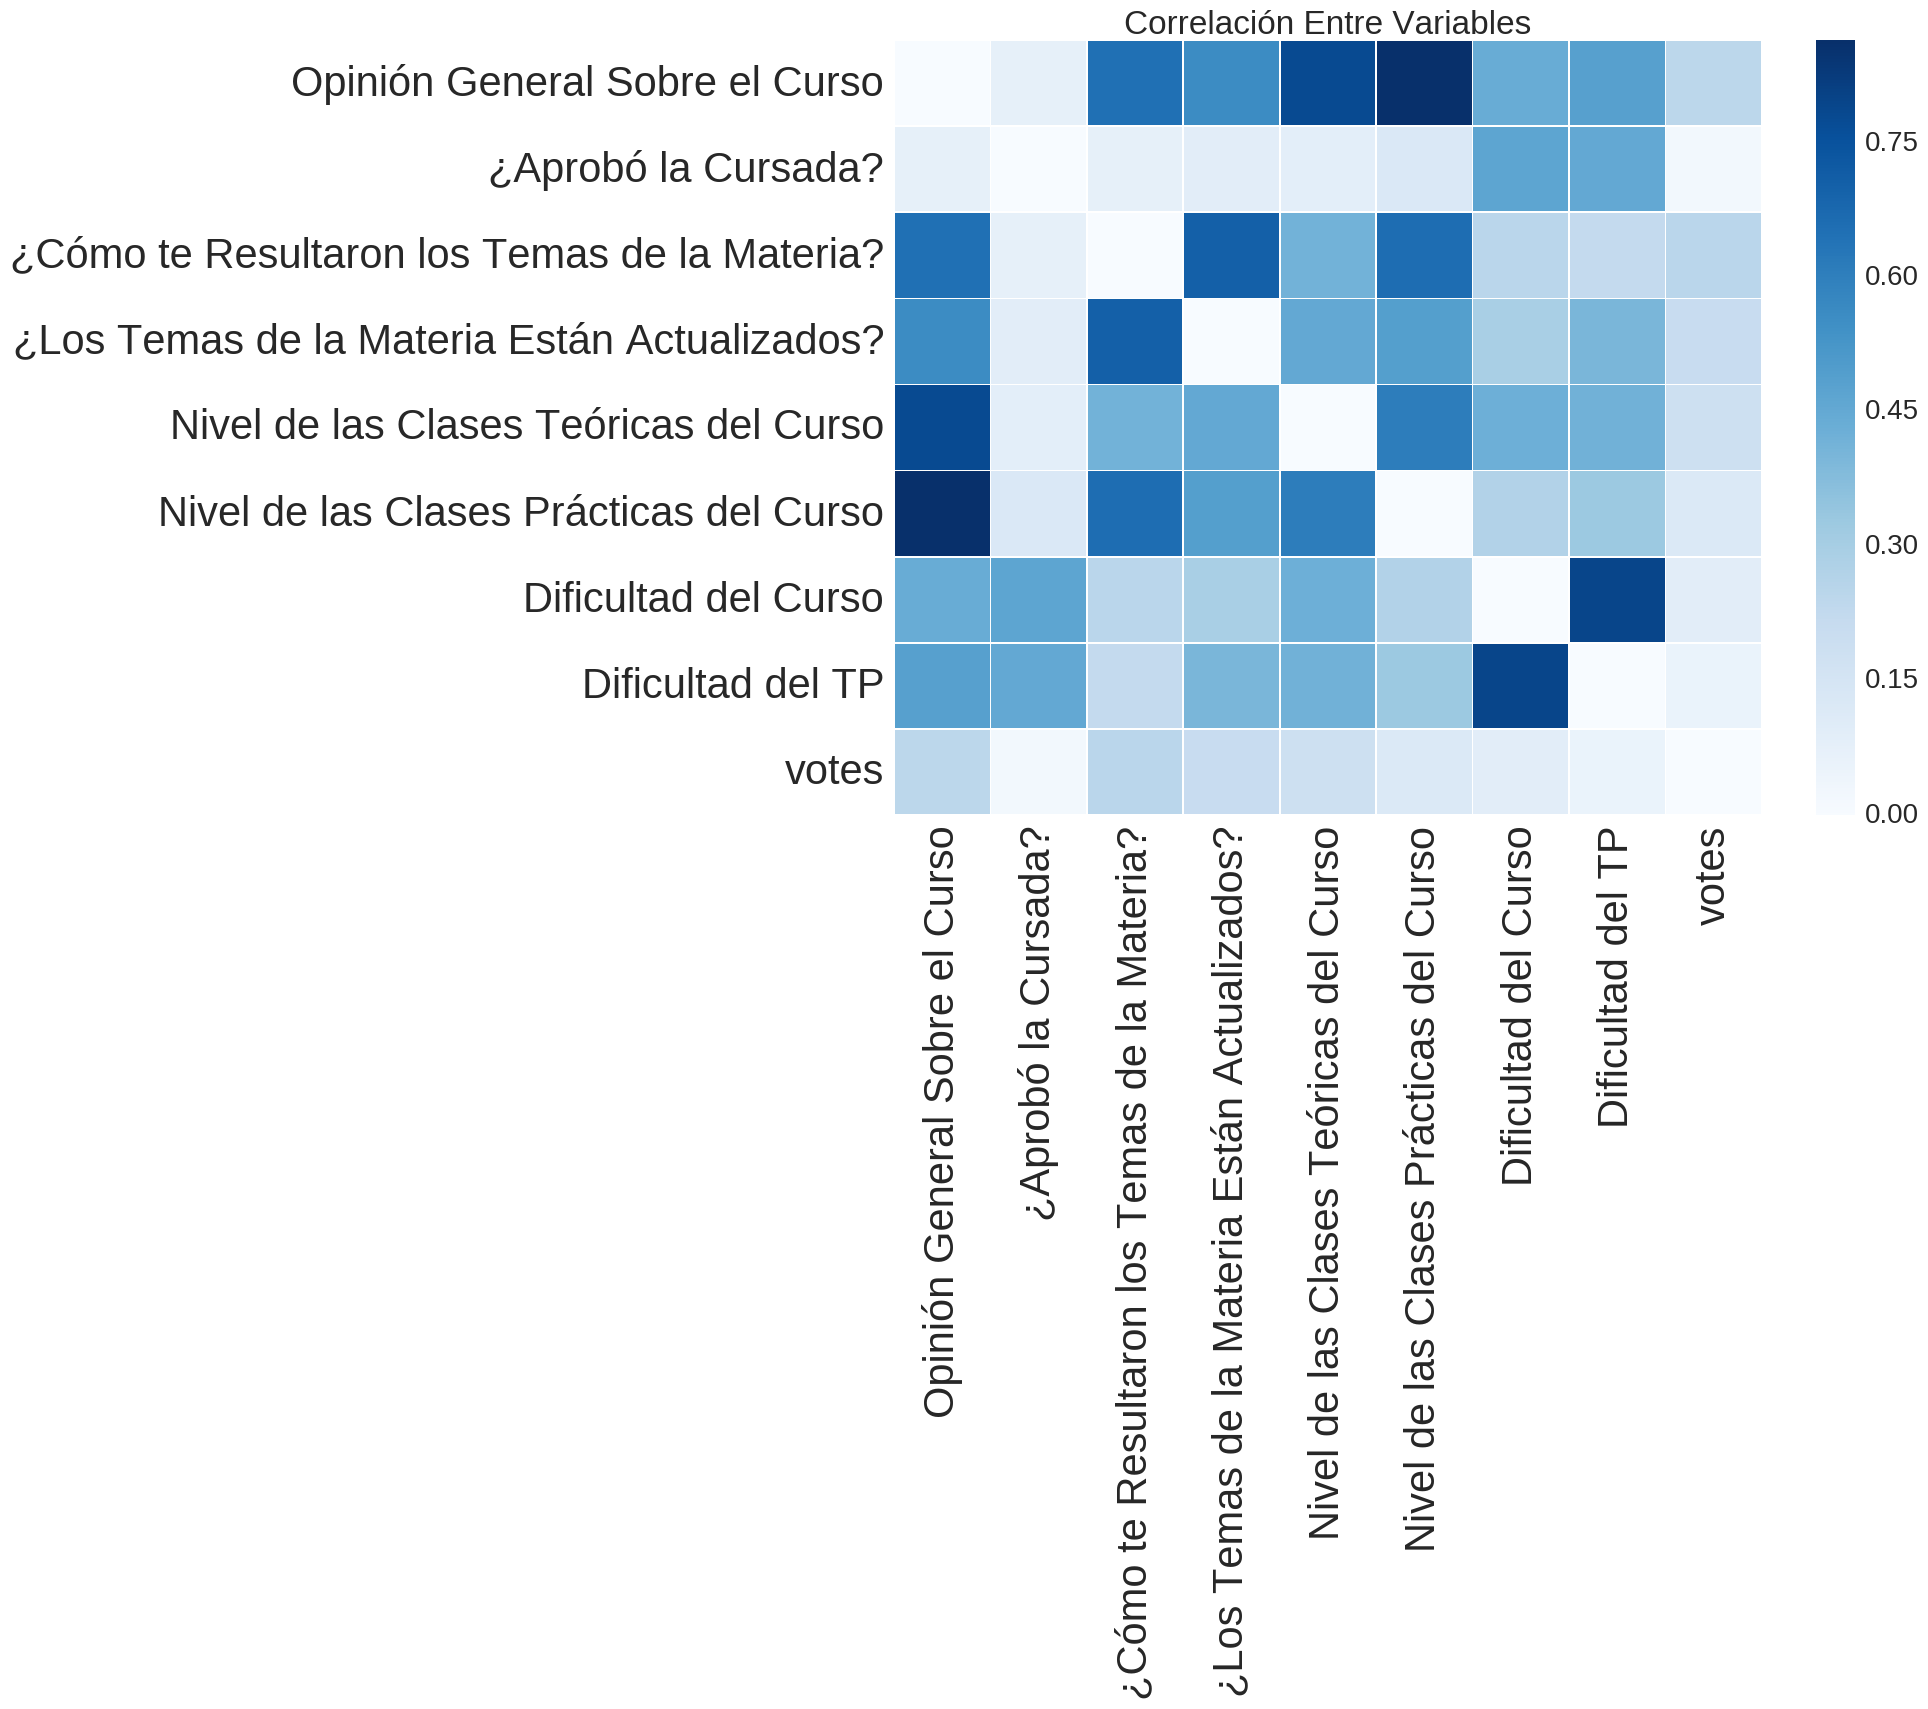

In [21]:
cor = g_mean.corr()
cor.values[[np.arange(9)]*2] = 0
cor.drop('votes',axis=1)
fig, ax = plt.subplots(figsize=(14,10))         # Sample figsize in inches
sns.set(font_scale=2)
sns.heatmap(cor.applymap(abs),annot=False, linewidths=.5,cmap='Blues',  ax=ax);
plt.title('Correlación Entre Variables');

## Diferencia Entre Nivel de Clases Teóricas y Prácticas
Hacia la derecha: Las clases teóricas son mejores que las prácticas.
Hacia la izquierda: Las clases prácticas son mejores que las teóricas.
En el centro: Poca o Ninguna diferencia.

In [22]:
g_mean['dif_teo_prac'] = ((g_mean['Nivel de las Clases Teóricas del Curso']-(g_mean['Nivel de las Clases Prácticas del Curso'])))

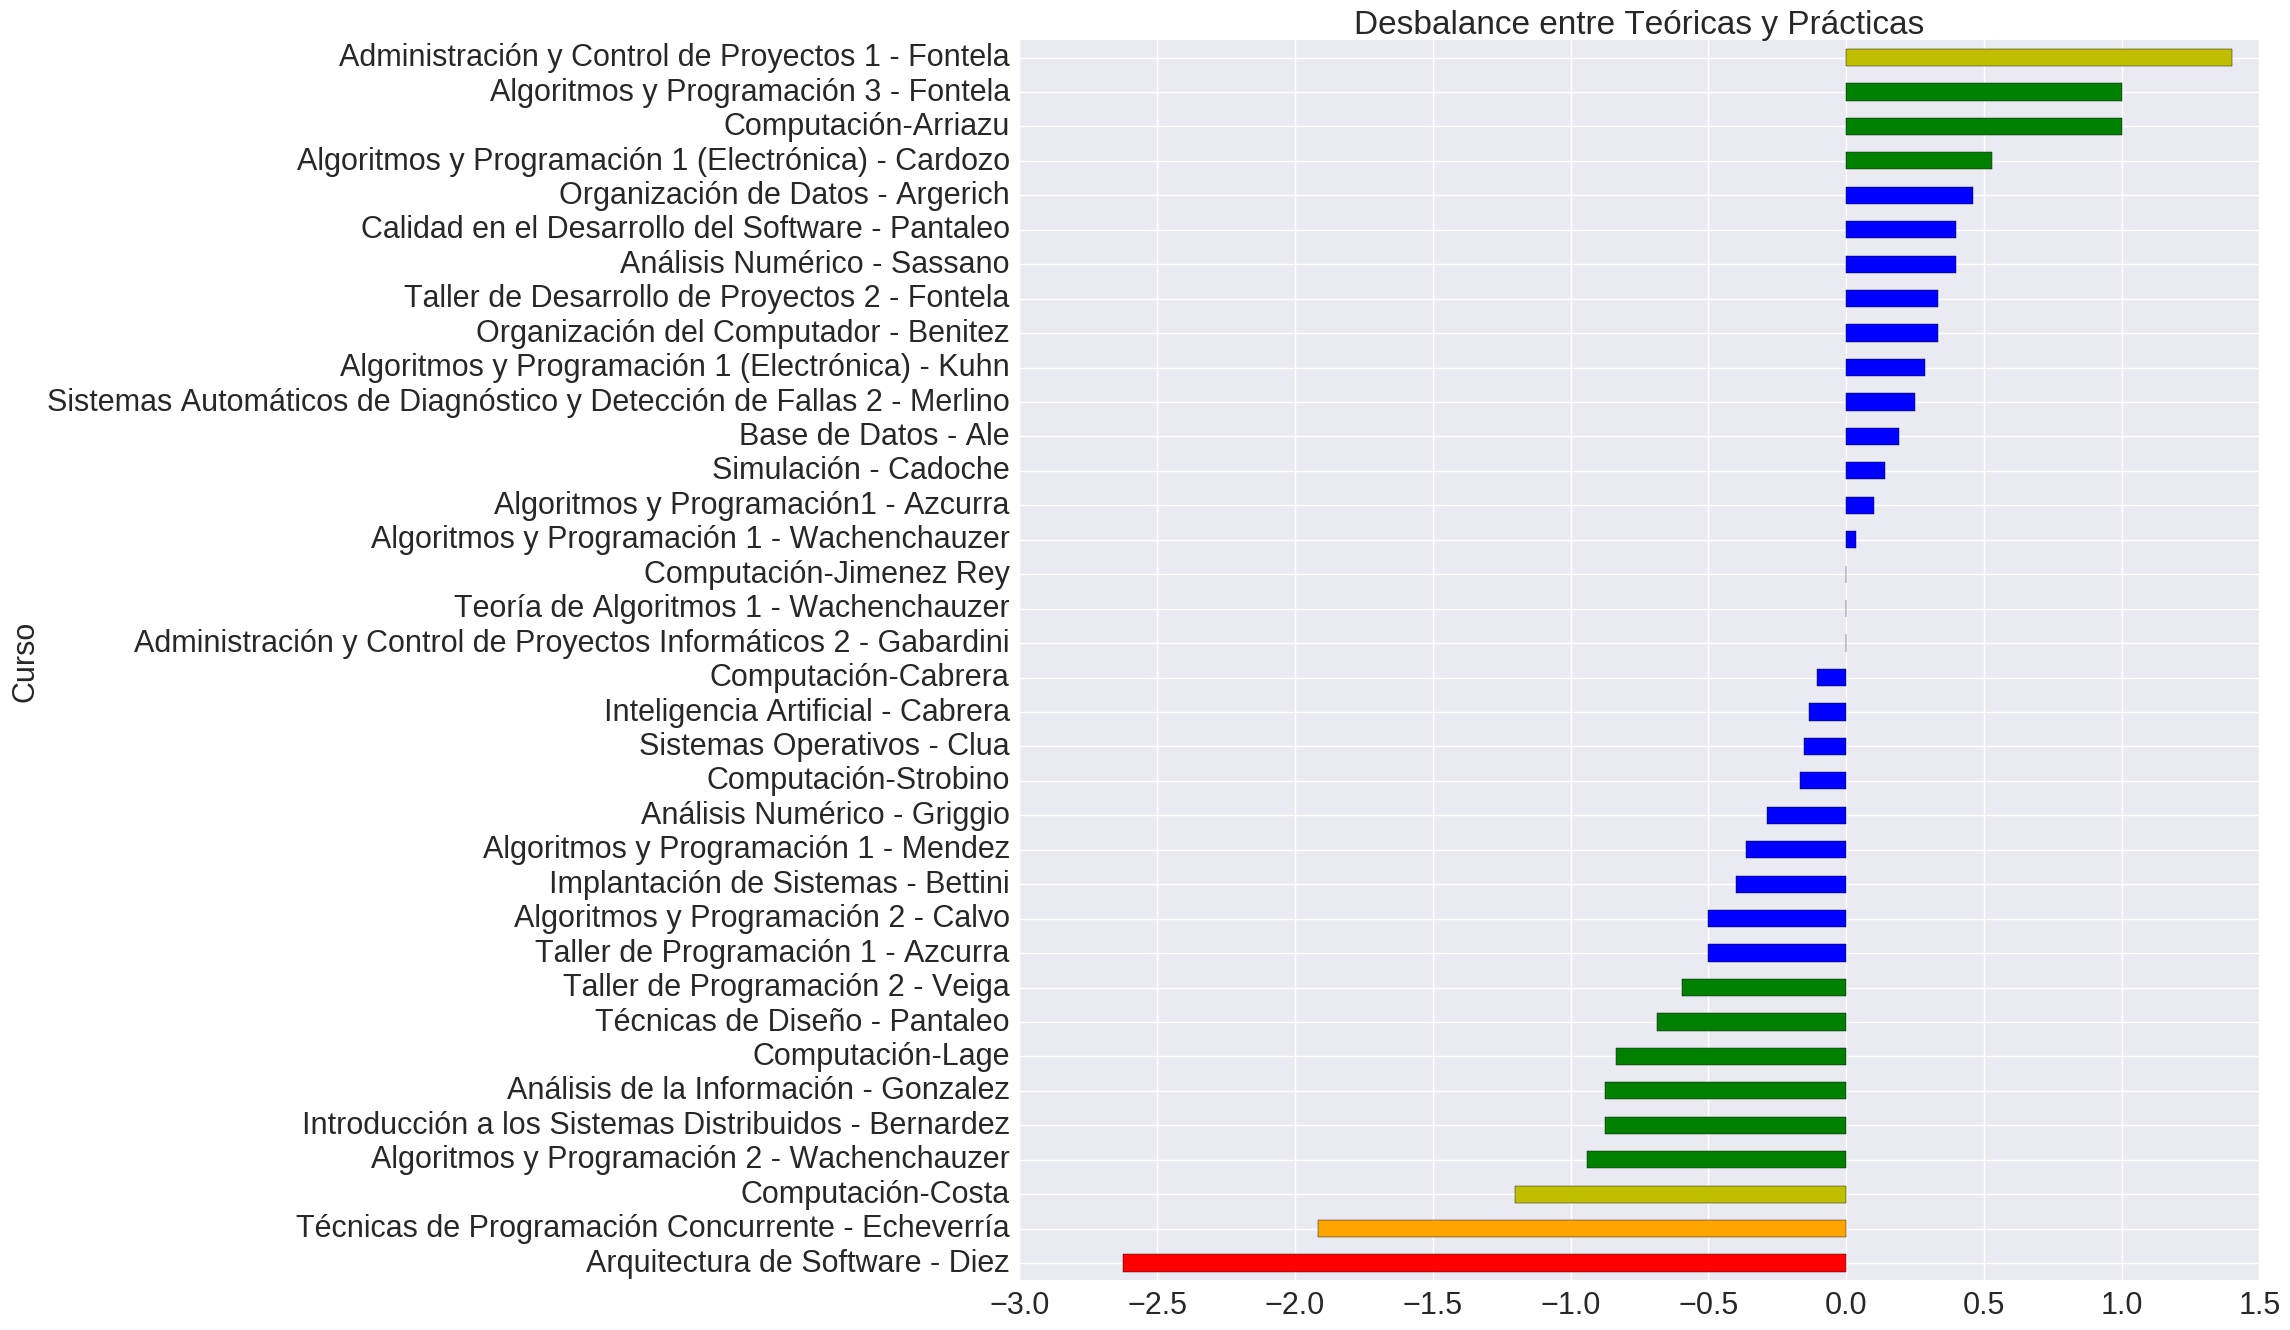

In [23]:
VARIABLE = 'dif_teo_prac'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(-abs(g_mean[VARIABLE]),5,labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title='Desbalance entre Teóricas y Prácticas');

## Promedio General por Curso

In [24]:
g_mean['general_ave'] = (g_mean['Opinión General Sobre el Curso']+g_mean['¿Cómo te Resultaron los Temas de la Materia?']+g_mean['¿Los Temas de la Materia Están Actualizados?']+g_mean['Nivel de las Clases Teóricas del Curso']+g_mean['Nivel de las Clases Prácticas del Curso']+g_mean['Dificultad del Curso'])/6

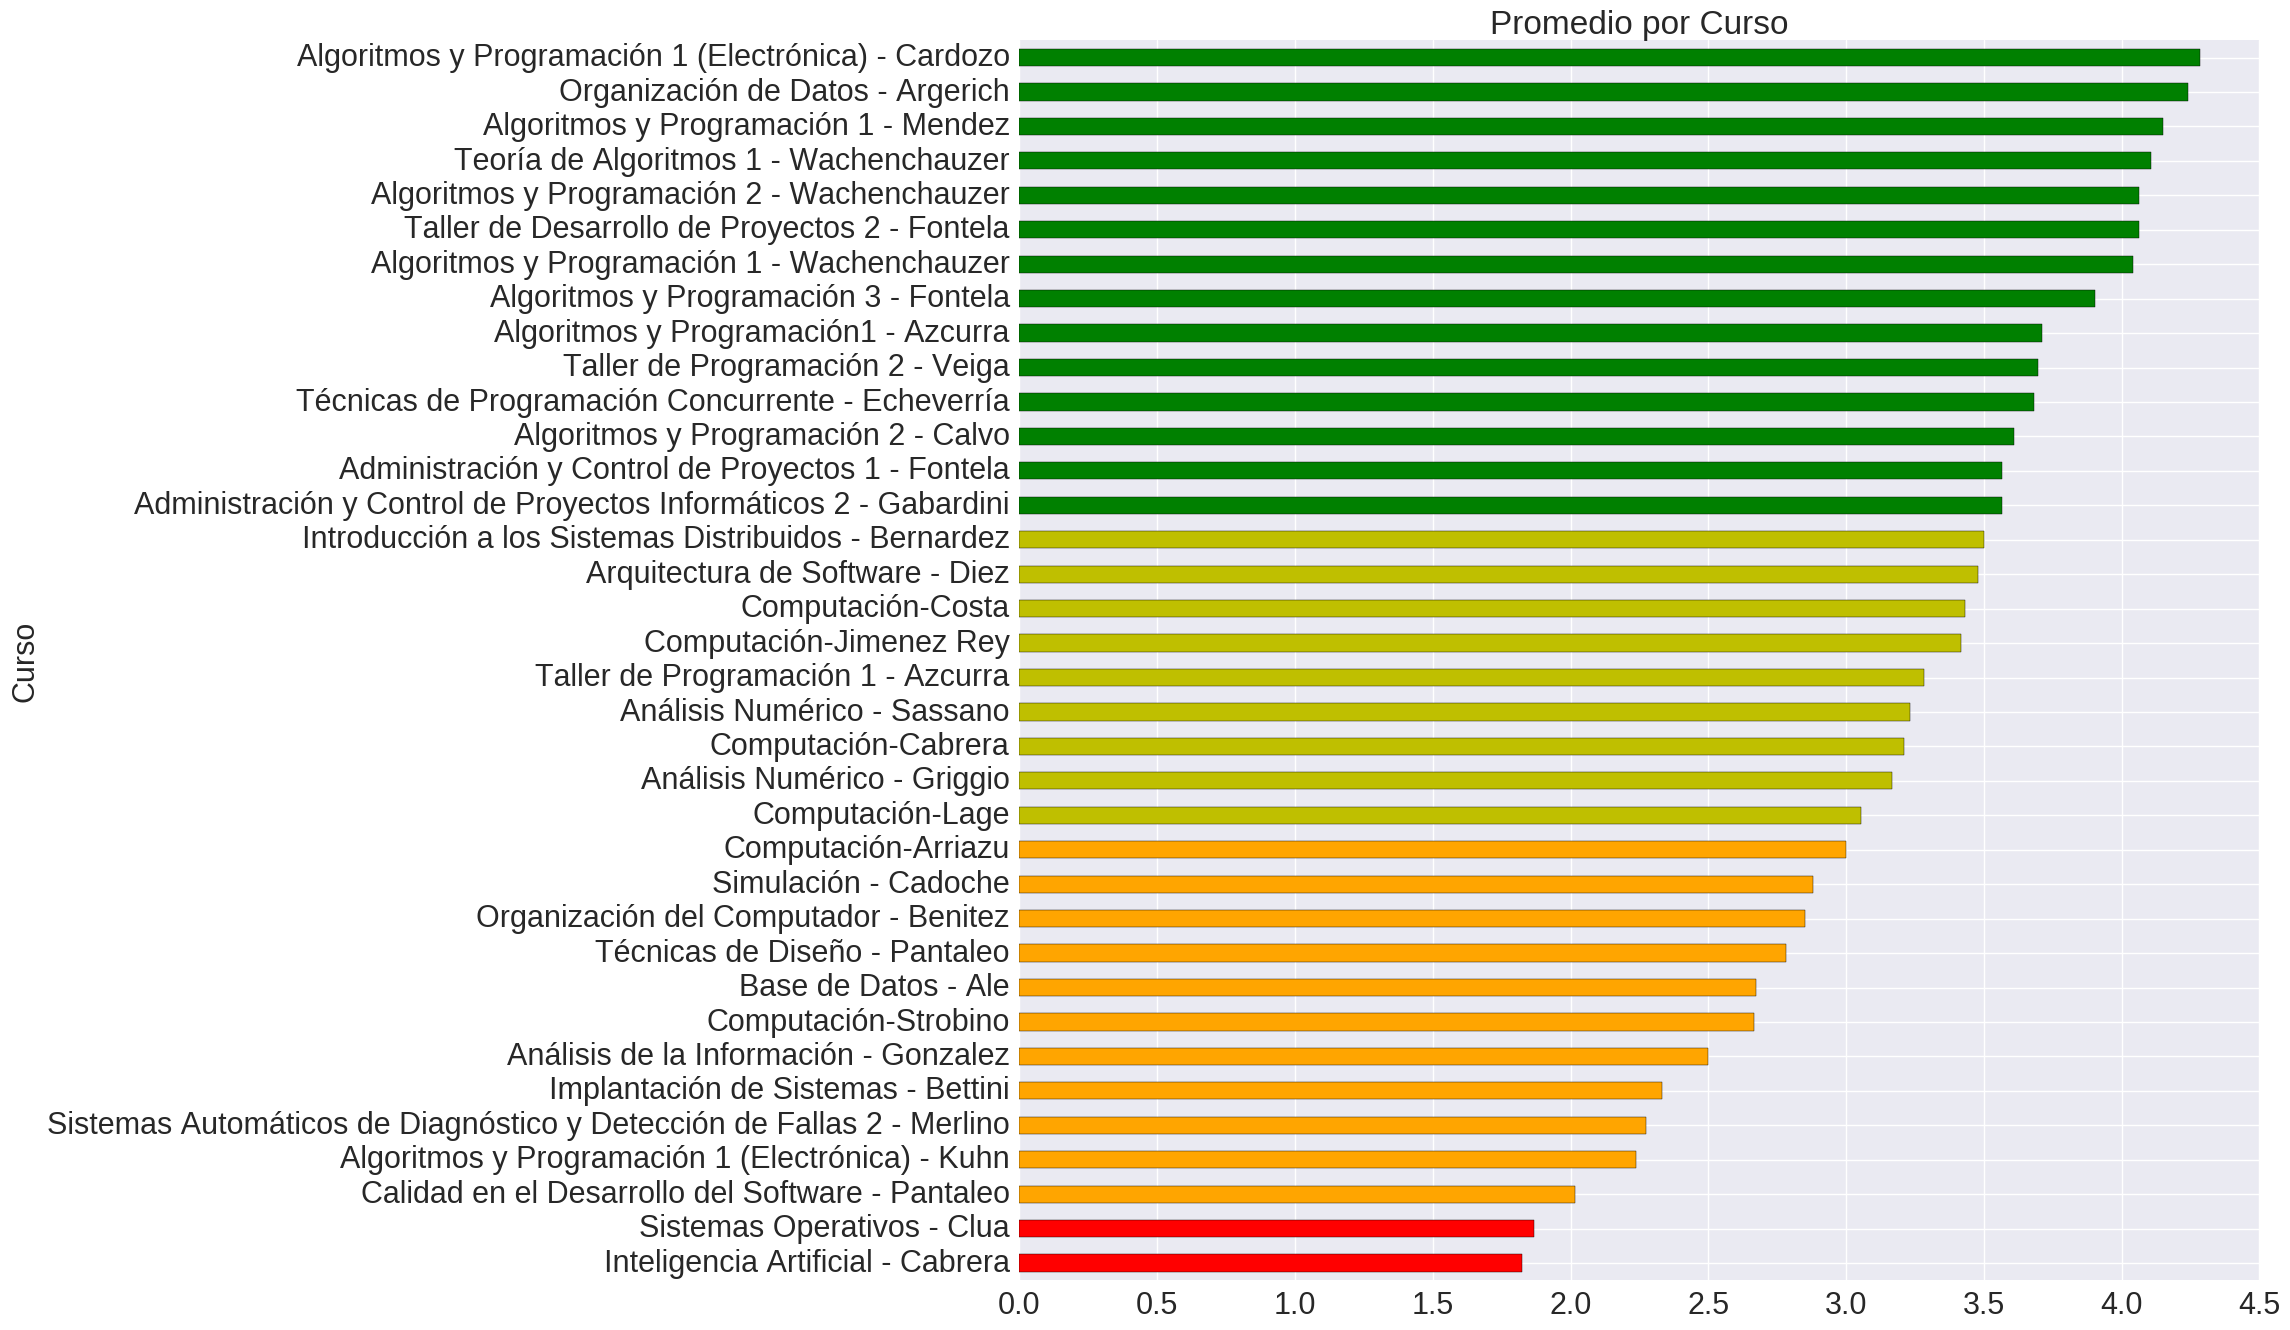

In [25]:
VARIABLE = 'general_ave'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title="Promedio por Curso");